<a href="https://colab.research.google.com/github/Snoveedh/DataScience/blob/main/AirFlightData_Without_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rohitgrewal_airlines_flights_data_path = kagglehub.dataset_download('rohitgrewal/airlines-flights-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')
df1 = df.copy()
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
!pip install ydata-profiling
!pip install pydantic-settings
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
!pip install ipywidgets

def profile_data(df: pd.DataFrame, output_file: str = None):
    """
    Generate an interactive data profiling report.
    """
    profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)
    if output_file:
        profile.to_file(output_file)
    else:
        profile.to_notebook_iframe()
    return profile

def auto_detect_problem_type(df: pd.DataFrame, target_col: str = None) -> str:
    """
    Automatically detect the ML problem type based on target column and dataset.
    """
    if target_col is None or target_col not in df.columns:
        return "unsupervised (clustering or other)"

    target = df[target_col]
    datetime_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
    if pd.api.types.is_datetime64_any_dtype(df.index) or len(datetime_cols) > 0:
        if pd.api.types.is_numeric_dtype(target):
            return "time series regression"
        else:
            return "time series classification"

    if pd.api.types.is_numeric_dtype(target):
        unique_vals = target.nunique()
        if unique_vals > 20:
            return "regression"
        else:
            return "classification"

    if pd.api.types.is_categorical_dtype(target) or target.dtype == object:
        return "classification"

    return "unknown"

# Example usage
# DATA_PATH = "/kaggle/input/airlines-flights-data/airlines_flights_data.csv"
TARGET_COL = "duration"  # Replace with actual target column name

# df = pd.read_csv(DATA_PATH)

# Profile dataset (generates interactive report in notebook or saves to file)
profile = profile_data(df)  # For Jupyter notebook display
# profile = profile_data(df, output_file="data_profile_report.html")  # To save HTML report

# Auto detect problem type
problem_type = auto_detect_problem_type(df, TARGET_COL)
print(f"Auto-detected problem type: {problem_type}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.4 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:04<00:00,  2.89it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Auto-detected problem type: regression


In [ ]:
# import pandas as pd
# Separate numerical and categorical columns
# Separate numerical and categorical columns
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# cat_cols = df.select_dtypes(include=['object', 'category']).columns

# df1 = df.copy()
# Separate numerical and categorical columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df1.select_dtypes(include=['object', 'category']).columns

def remove_duplicates(df1):
    """
    Remove duplicate rows from dataset.
    """
    before = len(df1)
    df1 = df1.drop_duplicates()
    after = len(df1)
    print(f"Duplicates removed: {before - after}")
    print("remove dups completed")
    return df1
remove_duplicates(df1)


def check_missing_values(df1):
    """
    Display missing value counts and percentages per column.
    """
    missing = df1.isnull().sum()
    percent = (missing / len(df1)) * 100
    missing_df = pd.DataFrame({'MissingCount': missing, 'MissingPercent': percent})
    print(missing_df[missing_df['MissingCount'] > 0])
check_missing_values(df1)

# Imputation example: mean for numerical, mode for categorical
def impute_missing_values(df1, num_cols, cat_cols):
    """
    Impute missing values in numerical and categorical columns.
    """
    for col in num_cols:
        mean_value = df1[col].mean()
        df1[col].fillna(mean_value, inplace=True)

    for col in cat_cols:
        mode_value = df1[col].mode()[0]
        df1[col].fillna(mode_value, inplace=True)
    return df1
impute_missing_values(df1, num_cols,cat_cols )


Duplicates removed: 0
remove dups completed
Empty DataFrame
Columns: [MissingCount, MissingPercent]
Index: []


/tmp/ipykernel_36/1999681541.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(mean_value, inplace=True)
/tmp/ipykernel_36/1999681541.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.isnull().sum()

df_index            0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df1.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


                index  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      300153         300153  300153   
unique            NaN        6    1561           6              6       3   
top               NaN  Vistara  UK-706       Delhi        Morning     one   
freq              NaN   127859    3235       61343          71146  250863   
mean    150076.000000      NaN     NaN         NaN            NaN     NaN   
std      86646.852011      NaN     NaN         NaN            NaN     NaN   
min          0.000000      NaN     NaN         NaN            NaN     NaN   
25%      75038.000000      NaN     NaN         NaN            NaN     NaN   
50%     150076.000000      NaN     NaN         NaN            NaN     NaN   
75%     225114.000000      NaN     NaN         NaN            NaN     NaN   
max     300152.000000      NaN     NaN         NaN            NaN     NaN   

       arrival_time destination_city    class       duration      days_left

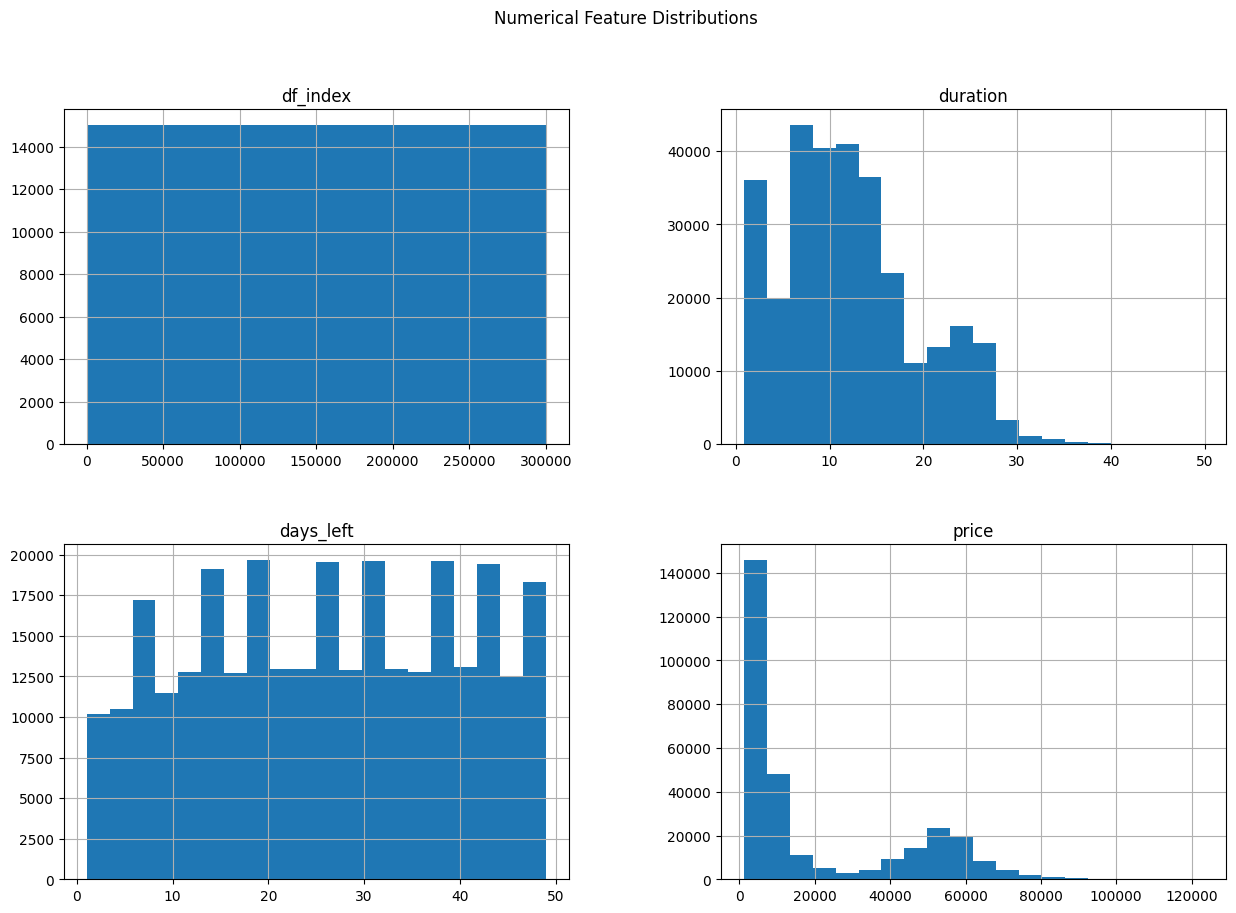

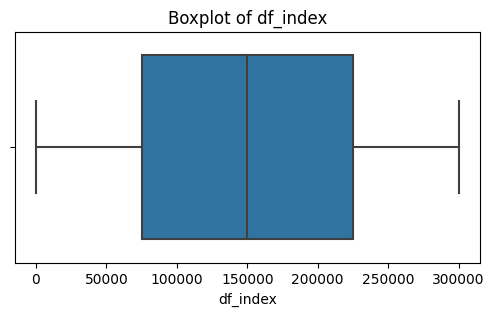

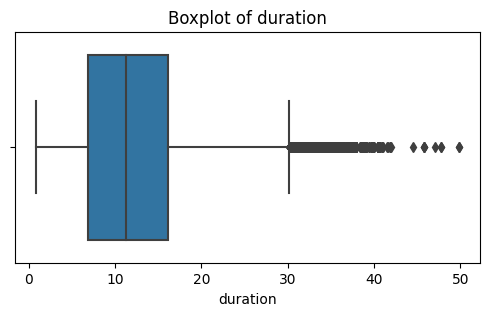

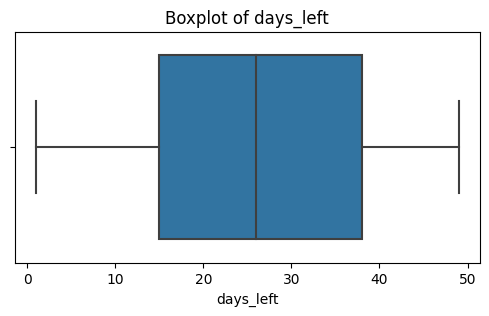

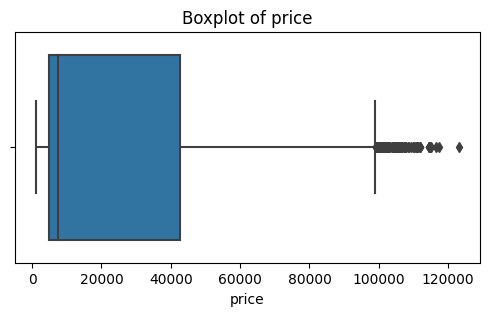

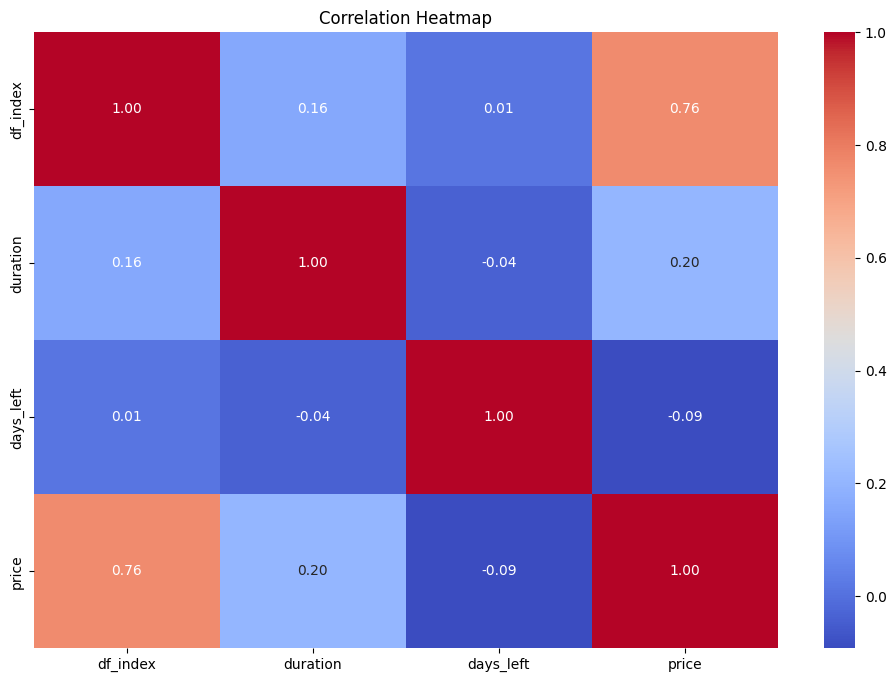

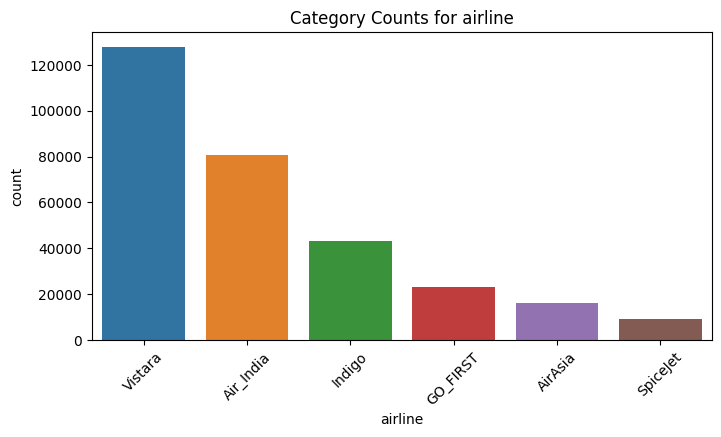

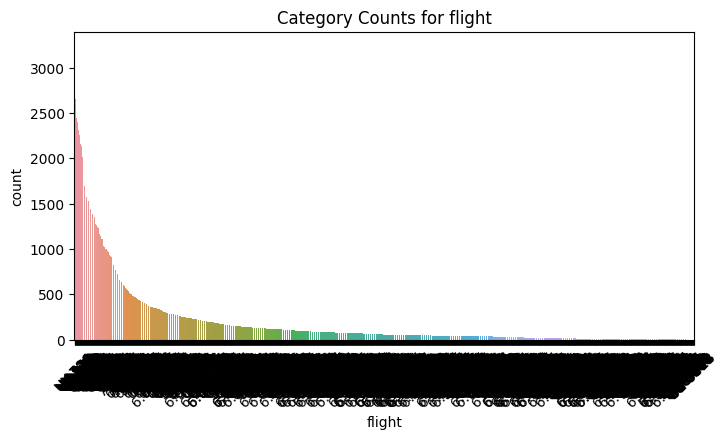

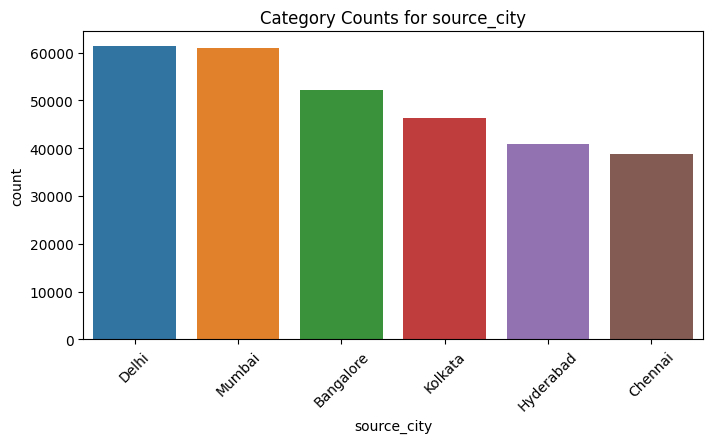

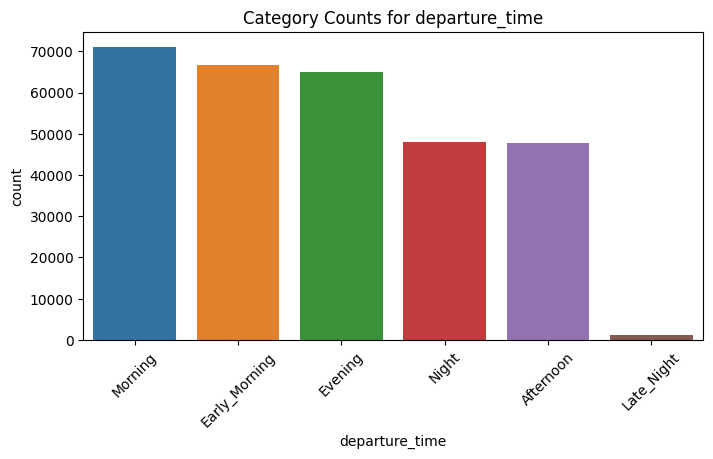

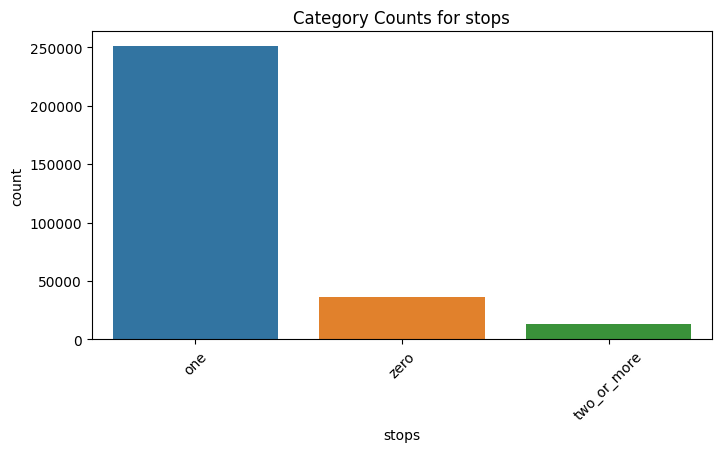

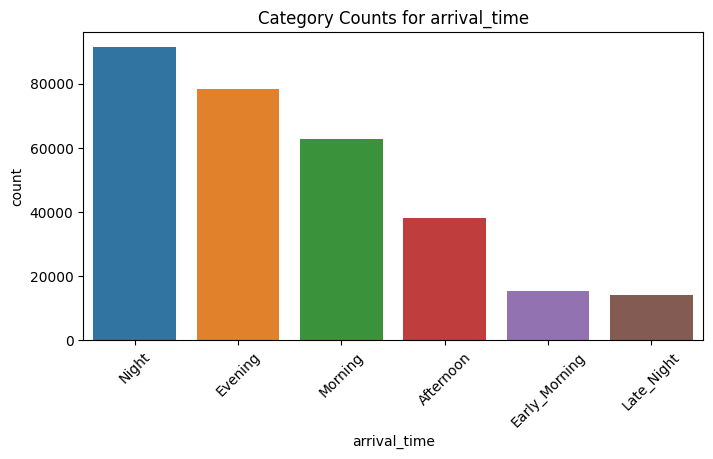

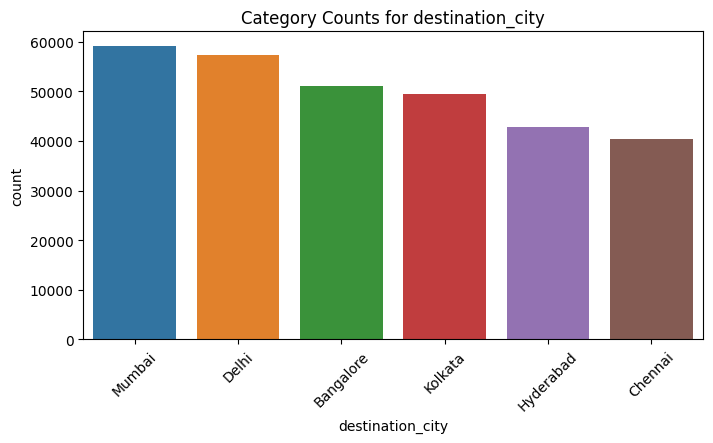

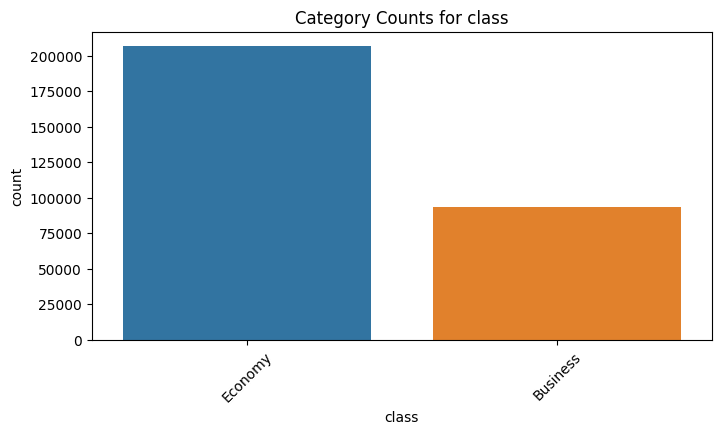

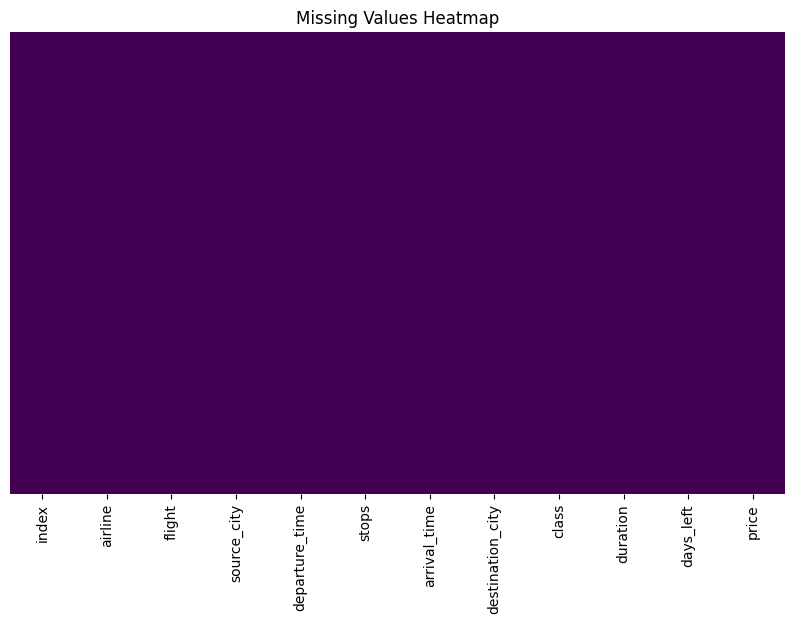

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load dataset (replace with actual path)
# DATA_PATH = "data/dataset.csv"
# df = pd.read_csv(DATA_PATH)

# df = df.drop(columns = {"df_index"})

# Basic statistical summary
print(df1.describe(include='all'))

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Histograms for numerical features
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Boxplots for outlier visualization
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation heatmap (Pearson)
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Countplots for categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Category Counts for {col}")
    plt.xticks(rotation=45)
    plt.show()

# Missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



--- Checking Normality for 'duration' ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Shapiro-Wilk Test Statistic: 0.9564
P-value: 0.0000
Conclusion: The 'duration' column likely does not come from a normal distribution.

--- Checking Normality for 'price' ---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.7520
P-value: 0.0000
Conclusion: The 'price' column likely does not come from a normal distribution.


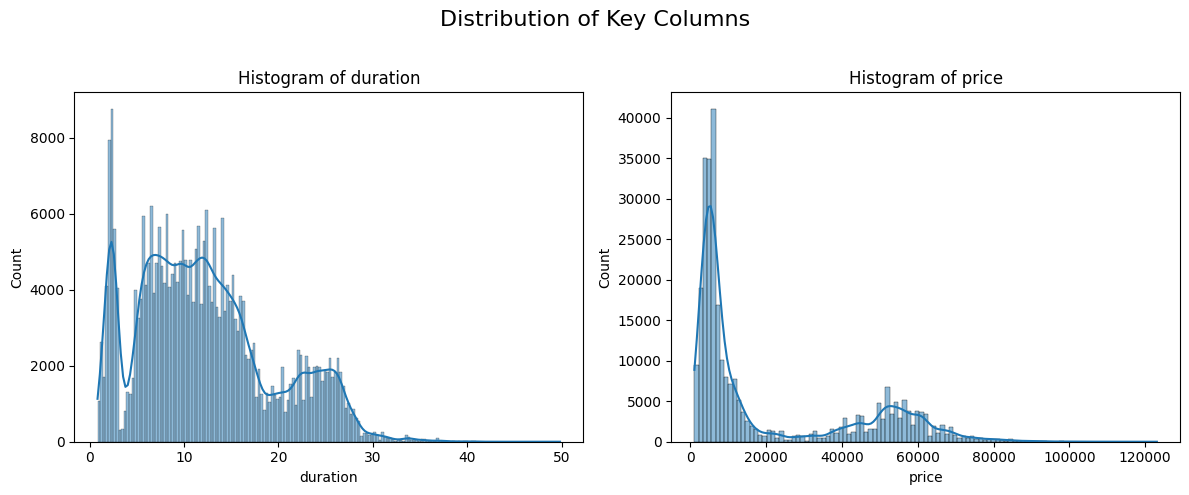

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame, already loaded.
# For example: df = pd.read_csv('your_data.csv')

# List of columns to check for normality
columns_to_check = ['duration', 'price']

# Create a figure for plotting
fig, axes = plt.subplots(1, len(columns_to_check), figsize=(12, 5))
fig.suptitle('Distribution of Key Columns', fontsize=16)

for i, col in enumerate(columns_to_check):
    print(f"\n--- Checking Normality for '{col}' ---")

    # Drop missing values for the statistical test
    data_to_test = df1[col].dropna()

    # Visual check with a histogram
    sns.histplot(data_to_test, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

    # Statistical check with Shapiro-Wilk test
    stat, p_value = shapiro(data_to_test)

    print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpretation
    if p_value > 0.05:
        print(f"Conclusion: The '{col}' column likely comes from a normal distribution.")
    else:
        print(f"Conclusion: The '{col}' column likely does not come from a normal distribution.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

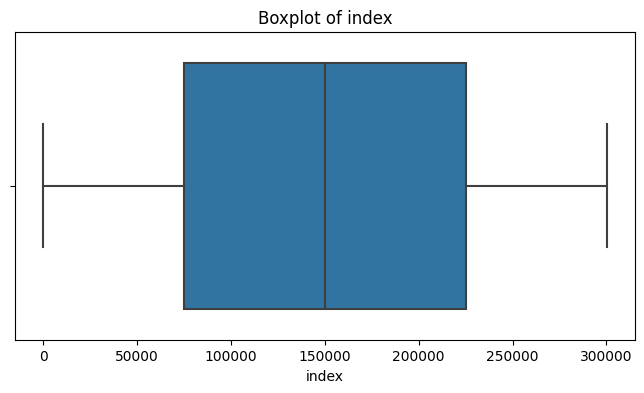

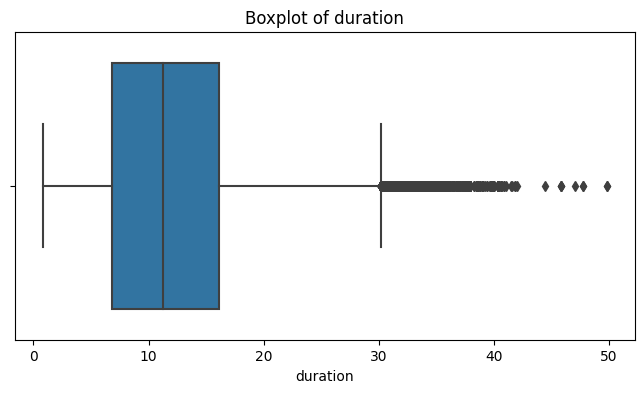

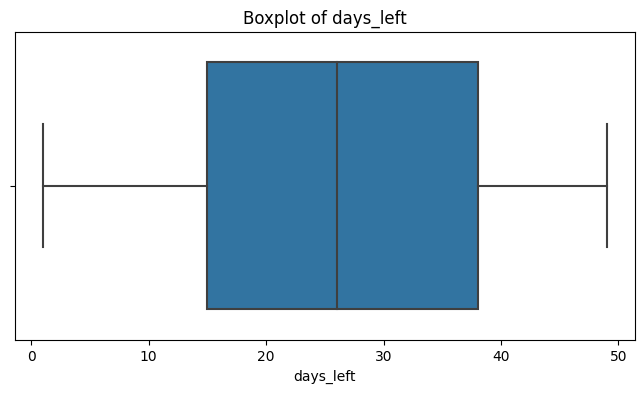

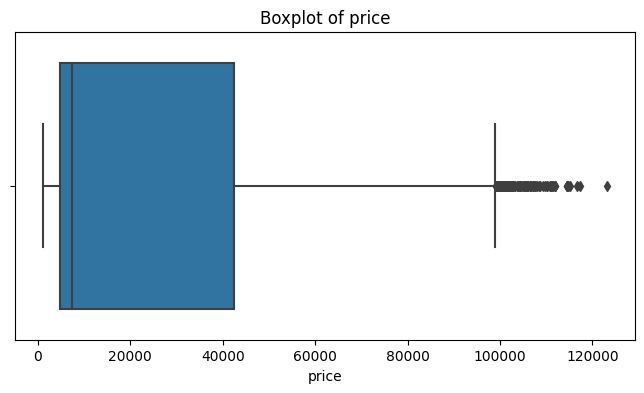

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_boxplots(data):
    """
    Plot boxplots for all numeric columns in a DataFrame.
    """
    # Find all numeric columns in the DataFrame
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

    # Check if any numeric columns were found
    if not numeric_cols:
        print("No numeric columns found to plot.")
        return

    # Loop through the list of numeric column names
    for col in numeric_cols:
        plt.figure(figsize=(8, 4)) # Adjusted figure size for better readability
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

plot_boxplots(df1)

In [ ]:
df = df.drop('df_index', axis=1)

In [ ]:
#After Cleaning as well if any outliers use winsorize to cap. outliers correction only applicatble for num cols.
#if col hav outlier is normal then apply zscore technique
#when not col data is not normal or skew then use below normal to find the outliers


# def detect_outliers_iqr(data, col):
#     """
#     Detect outliers in a column using the IQR method.
#     """
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
#     return outliers

# outliers_in_duration = detect_outliers_iqr(df1, 'duration')
# outliers_in_price = detect_outliers_iqr(df1, 'price')

# # Now you can print or view the results.
# print("Outliers in the 'duration' column:")
# print(outliers_in_duration)

# print("\nOutliers in the 'price' column:")
# print(outliers_in_price)

from scipy.stats import zscore
def detect_outliers_zscore(data, col, threshold=3):
    """
    Detect outliers in a column using the Z-score method.
    """
    # Create a Series with Z-scores and align its index with the original data
    z_scores_series = data[col].dropna()
    z_scores = zscore(z_scores_series)

    # Use the index of the Z-scores to filter the original DataFrame
    outlier_indices = z_scores_series[np.abs(z_scores) > threshold].index
    outliers = data.loc[outlier_indices]

    return outliers

detect_outliers_zscore(df, 'duration',threshold=3)


,df_index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10540,10540,Air_India,AI-9887,Delhi,Early_Morning,two_or_more,Evening,Bangalore,Economy,36.92,4,12321
20464,20464,Vistara,UK-815,Delhi,Morning,two_or_more,Evening,Kolkata,Economy,35.83,3,17462
20467,20467,Vistara,UK-801,Delhi,Morning,two_or_more,Evening,Kolkata,Economy,34.83,3,18927
29417,29417,Air_India,AI-481,Delhi,Morning,two_or_more,Night,Hyderabad,Economy,36.92,7,10474
29418,29418,Air_India,AI-435,Delhi,Early_Morning,two_or_more,Night,Hyderabad,Economy,39.67,7,10474
...,...,...,...,...,...,...,...,...,...,...,...,...
283030,283030,Vistara,UK-860,Hyderabad,Early_Morning,one,Night,Kolkata,Business,37.92,2,64733
293606,293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928
295740,295740,Air_India,AI-509,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Business,34.50,46,54986
295952,295952,Vistara,UK-836,Chennai,Morning,one,Night,Kolkata,Business,34.00,2,68963


In [ ]:
# No outliers skipping winsorization to cap



numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()
def winsorize_column(data, col):
    """
    Cap outliers using the IQR method bounds.
    """
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return df
winsorize_column(df1,numeric_cols)

,df_index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Outliers detected by IQR in index:
Empty DataFrame
Columns: [index, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


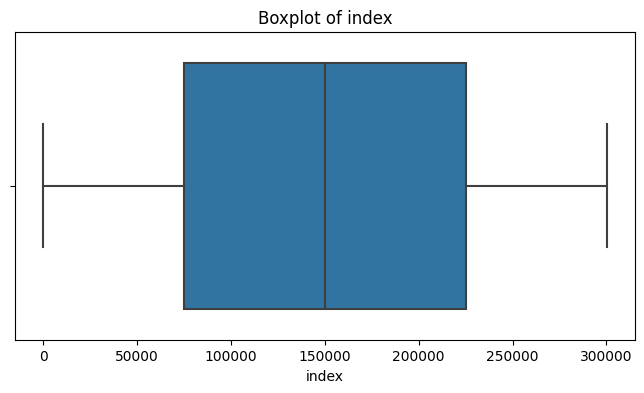

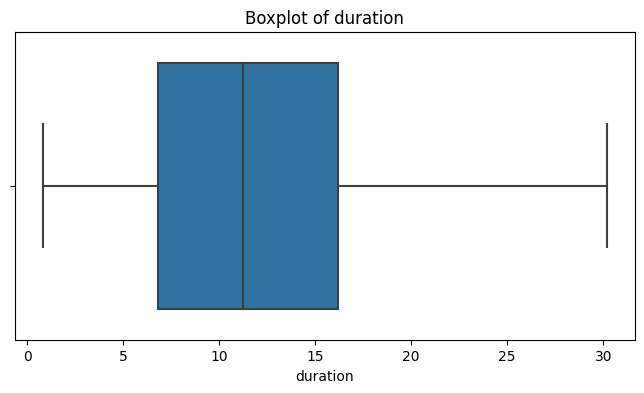

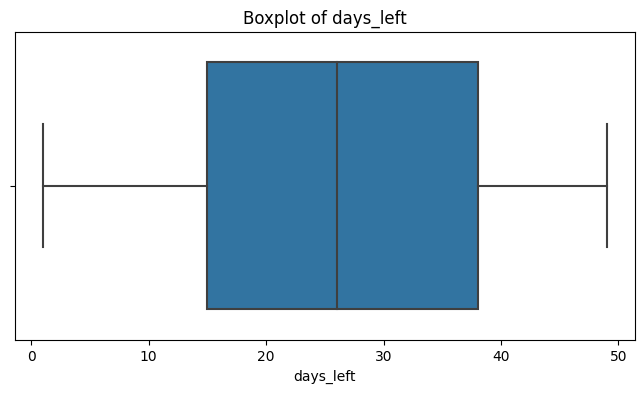

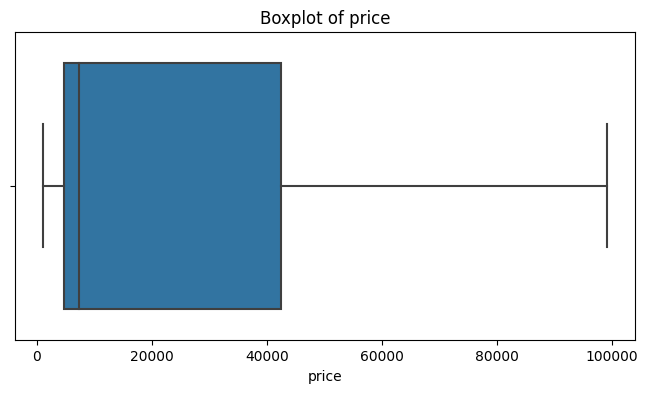

After winsorization, summary stats for index:
count    300153.000000
mean     150076.000000
std       86646.852011
min           0.000000
25%       75038.000000
50%      150076.000000
75%      225114.000000
max      300152.000000
Name: index, dtype: float64


In [ ]:
#Same here not outliers..skipping winsorization

from scipy.stats.mstats import winsorize
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers for first numerical column using IQR
column_to_check = num_cols[0]
outliers_iqr = detect_outliers_zscore(df1, column_to_check)
print(f"Outliers detected by IQR in {column_to_check}:")
print(outliers_iqr)

# Visualize outliers
plot_boxplots(df1)

# Treat outliers with winsorization
df = winsorize_column(df1, column_to_check)
print(f"After winsorization, summary stats for {column_to_check}:")
print(df1[column_to_check].describe())


In [ ]:
df1.shape

(300153, 12)

In [ ]:
df.shape

(300153, 12)

In [ ]:
df1.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [ ]:
df1.shape

(300153, 12)

In [ ]:
df1.sample(n=10, random_state=42)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,27131.0,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40.0,7366.0
266857,266857.0,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42.0,64831.0
141228,141228.0,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41.0,6195.0
288329,288329.0,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14.0,60160.0
97334,97334.0,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20.0,6578.0
135931,135931.0,AirAsia,I5-510,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,10.83,5.0,4555.0
290630,290630.0,Vistara,UK-826,Chennai,Afternoon,zero,Afternoon,Mumbai,Business,2.00,7.0,23838.0
141944,141944.0,Indigo,6.00E-271,Kolkata,Early_Morning,one,Afternoon,Bangalore,Economy,7.75,46.0,3860.0
244517,244517.0,Air_India,AI-619,Mumbai,Night,one,Night,Chennai,Business,26.33,44.0,32230.0
215903,215903.0,Vistara,UK-953,Delhi,Night,one,Evening,Kolkata,Business,20.17,2.0,76841.0


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# def heuristic_auto_encode(df, ordinal_threshold=5):
#     """
#     Automatically applies Label Encoding or One-Hot Encoding based on a
#     cardinality threshold.

#     Args:
#         df (pd.DataFrame): The DataFrame to encode.
#         ordinal_threshold (int): The maximum number of unique categories
#                                  for a column to be considered for Label Encoding.

#     Returns:
#         pd.DataFrame: A new DataFrame with all categorical columns encoded.
#     """
#     encoded_df = df.copy()

#     all_cat_cols = encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()

#     label_encode_cols = []
#     ohe_cols = []

#     for col in all_cat_cols:
#         if encoded_df[col].nunique() <= ordinal_threshold:
#             # Assume columns with few unique values are ordinal
#             label_encode_cols.append(col)
#         else:
#             # Assume columns with many unique values are nominal
#             ohe_cols.append(col)

#     # Apply Label Encoding
#     for col in label_encode_cols:
#         le = LabelEncoder()
#         encoded_df[col] = le.fit_transform(encoded_df[col])
#         print(f"Applied Label Encoding to: {col} (Unique values: {df[col].nunique()})")

#     # Apply One-Hot Encoding
#     encoded_df = pd.get_dummies(encoded_df, columns=ohe_cols, drop_first=True)
#     print(f"Applied One-Hot Encoding to: {ohe_cols}")

#     return encoded_df

# # --- How to use this function ---
# # Assuming df1 is your cleaned DataFrame
# df_encoded = heuristic_auto_encode(df1, ordinal_threshold=5)

# print("\nFirst 5 rows of the encoded DataFrame:")
# print(df_encoded.head())

In [ ]:
# It checks the unique values lets say more than equal to 95% unique then we should not apply encoding on that.
# Get the count of unique values in the 'flight' column
unique_flight_count = df1['flight'].nunique()

# Print the result
print(f"The 'flight' column has {unique_flight_count} unique values.")

# You can also check the total number of rows in the DataFrame for comparison
total_rows = len(df1)
print(f"The entire DataFrame has {total_rows} rows.")

The 'flight' column has 1561 unique values.
The entire DataFrame has 300153 rows.


In [ ]:
# if unique values are 95% in a clumn then we should not apply encoders to it
# Assuming your DataFrame is named 'df'
total_rows = len(df1)

# Check all columns and identify those with high cardinality
cols_to_exclude = []
for col in df1.columns:
    unique_ratio = df1[col].nunique() / total_rows
    if unique_ratio > 0.95:  # You can adjust this threshold
        cols_to_exclude.append(col)
        print(f"Column '{col}' has a unique ratio of {unique_ratio:.2f} and should likely be excluded.")

print(f"\nFinal list of columns to exclude: {cols_to_exclude}")

Column 'index' has a unique ratio of 1.00 and should likely be excluded.

Final list of columns to exclude: ['index']


In [ ]:
!pip install category-encoders
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

def magic_auto_encode(df, low_cardinality_threshold=5, high_cardinality_threshold=50):
    """
    Automatically applies different encoders based on the number of unique values.

    Args:
        df (pd.DataFrame): The DataFrame to encode.
        low_cardinality_threshold (int): Max unique values for Label Encoding.
        high_cardinality_threshold (int): Min unique values for Binary Encoding.

    Returns:
        pd.DataFrame: A new DataFrame with all categorical columns encoded.
    """
    encoded_df = df1.copy()

    # Identify all categorical columns
    all_cat_cols = encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()
    label_encode_cols = []
    ohe_cols = []
    binary_encode_cols = []

    for col in all_cat_cols:
        n_unique = encoded_df[col].nunique()
        if n_unique <= low_cardinality_threshold:
            label_encode_cols.append(col)
        elif n_unique > high_cardinality_threshold:
            binary_encode_cols.append(col)
        else:
            ohe_cols.append(col)

    print("--- Encoding Summary ---")
    print(f"Applying Label Encoding to: {label_encode_cols}")
    print(f"Applying One-Hot Encoding to: {ohe_cols}")
    print(f"Applying Binary Encoding to: {binary_encode_cols}")

    # Apply Label Encoding
    for col in label_encode_cols:
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col])

    # Apply One-Hot Encoding
    encoded_df = pd.get_dummies(encoded_df, columns=ohe_cols, drop_first=True)

    # Apply Binary Encoding
    if binary_encode_cols:
        encoder = ce.BinaryEncoder(cols=binary_encode_cols)
        encoded_df = encoder.fit_transform(encoded_df)

    return encoded_df

# --- How to use this function ---
# Assuming df1 is your cleaned DataFrame
df_encoded = magic_auto_encode(df1, low_cardinality_threshold=5, high_cardinality_threshold=50)

print("\nFirst 5 rows of the encoded DataFrame:")
print(df_encoded.head())

--- Encoding Summary ---
Applying Label Encoding to: ['stops', 'class']
Applying One-Hot Encoding to: ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
Applying Binary Encoding to: ['flight']

First 5 rows of the encoded DataFrame:
   index  flight_0  flight_1  flight_2  flight_3  flight_4  flight_5  \
0    0.0         0         0         0         0         0         0   
1    1.0         0         0         0         0         0         0   
2    2.0         0         0         0         0         0         0   
3    3.0         0         0         0         0         0         0   
4    4.0         0         0         0         0         0         0   

   flight_6  flight_7  flight_8  ...  arrival_time_Early_Morning  \
0         0         0         0  ...                       False   
1         0         0         0  ...                       False   
2         0         0         0  ...                        True   
3         0         0         1 

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# import category_encoders as ce

# def magic_auto_encode(df, low_cardinality_threshold=5, high_cardinality_threshold=50, high_cardinality_strategy='binary', exclude_cols=[]):
#     """
#     Automatically applies different encoders based on cardinality, with
#     an option for high-cardinality columns.

#     Args:
#         df (pd.DataFrame): The DataFrame to encode.
#         low_cardinality_threshold (int): Max unique values for Label Encoding.
#         high_cardinality_threshold (int): Min unique values for high-cardinality strategy.
#         high_cardinality_strategy (str): 'binary' or 'frequency'.
#         exclude_cols (list): A list of columns to exclude from encoding.

#     Returns:
#         pd.DataFrame: A new DataFrame with all categorical columns encoded.
#     """
#     encoded_df = df.copy()

#     all_cat_cols = [col for col in encoded_df.select_dtypes(include=['object', 'category']).columns.tolist() if col not in magic_auto_encode]

#     label_encode_cols = []
#     ohe_cols = []
#     high_card_cols = []

#     for col in all_cat_cols:
#         n_unique = encoded_df[col].nunique()
#         if n_unique <= low_cardinality_threshold:
#             label_encode_cols.append(col)
#         elif n_unique > high_cardinality_threshold:
#             high_card_cols.append(col)
#         else:
#             ohe_cols.append(col)

#     print("--- Encoding Summary ---")
#     print(f"Applying Label Encoding to: {label_encode_cols}")
#     print(f"Applying One-Hot Encoding to: {ohe_cols}")
#     print(f"Applying {high_cardinality_strategy} Encoding to: {high_card_cols}")

#     # Apply Label Encoding
#     for col in label_encode_cols:
#         le = LabelEncoder()
#         encoded_df[col] = le.fit_transform(encoded_df[col])

#     # Apply One-Hot Encoding
#     encoded_df = pd.get_dummies(encoded_df, columns=ohe_cols, drop_first=True)

#     # Apply high-cardinality strategy
#     if high_card_cols:
#         if high_cardinality_strategy == 'binary':
#             encoder = ce.BinaryEncoder(cols=high_card_cols)
#             encoded_df = encoder.fit_transform(encoded_df)
#         elif high_cardinality_strategy == 'frequency':
#             for col in high_card_cols:
#                 freq_map = encoded_df[col].value_counts(normalize=True)
#                 encoded_df[f'{col}_freq'] = encoded_df[col].map(freq_map)
#                 encoded_df = encoded_df.drop(columns=[col])

#     return encoded_df

# # --- How to use this function ---
# # Example 1: Use Binary Encoding for high-cardinality columns
# df_encoded_binary = magic_auto_encode(df1, low_cardinality_threshold=5, high_cardinality_threshold=50, high_cardinality_strategy='binary', exclude_cols=['flight'])

# # Example 2: Use Frequency Encoding for high-cardinality columns
# df_encoded_freq = magic_auto_encode(df1, low_cardinality_threshold=5, high_cardinality_threshold=50, high_cardinality_strategy='frequency', exclude_cols=['flight'])

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# import category_encoders as ce

# def magic_auto_encode_with_target(df, target_col, low_cardinality_threshold=5, high_cardinality_threshold=50, high_cardinality_strategy='binary', exclude_cols=[]):
#     """
#     Automatically applies different encoders based on cardinality, including
#     Target Encoding for high-cardinality columns.

#     Args:
#         df (pd.DataFrame): The DataFrame to encode.
#         target_col (str): The name of the target column.
#         low_cardinality_threshold (int): Max unique values for Label Encoding.
#         high_cardinality_threshold (int): Min unique values for high-cardinality strategy.
#         high_cardinality_strategy (str): 'binary', 'frequency', or 'target'.
#         exclude_cols (list): A list of columns to exclude from encoding.

#     Returns:
#         pd.DataFrame: A new DataFrame with all categorical columns encoded.
#     """
#     # Check if the target column exists in the DataFrame
#     if high_cardinality_strategy == 'target' and target_col not in df.columns:
#         raise ValueError(f"Target column '{target_col}' not found in DataFrame.")

#     encoded_df = df.copy()

#     # Exclude the target column and manually excluded columns from encoding
#     excluded_from_encoding = exclude_cols + [target_col]
#     all_cat_cols = [col for col in encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()
#                     if col not in excluded_from_encoding]

#     label_encode_cols = []
#     ohe_cols = []
#     high_card_cols = []

#     for col in all_cat_cols:
#         n_unique = encoded_df[col].nunique()
#         if n_unique <= low_cardinality_threshold:
#             label_encode_cols.append(col)
#         elif n_unique > high_cardinality_threshold:
#             high_card_cols.append(col)
#         else:
#             ohe_cols.append(col)

#     print("--- Encoding Summary ---")
#     print(f"Applying Label Encoding to: {label_encode_cols}")
#     print(f"Applying One-Hot Encoding to: {ohe_cols}")
#     print(f"Applying {high_cardinality_strategy} Encoding to: {high_card_cols}")

#     # Apply Label Encoding
#     for col in label_encode_cols:
#         le = LabelEncoder()
#         encoded_df[col] = le.fit_transform(encoded_df[col])

#     # Apply One-Hot Encoding
#     encoded_df = pd.get_dummies(encoded_df, columns=ohe_cols, drop_first=True)

#     # Apply high-cardinality strategy
#     if high_card_cols:
#         if high_cardinality_strategy == 'binary':
#             encoder = ce.BinaryEncoder(cols=high_card_cols)
#             encoded_df = encoder.fit_transform(encoded_df)
#         elif high_cardinality_strategy == 'frequency':
#             for col in high_card_cols:
#                 freq_map = encoded_df[col].value_counts(normalize=True)
#                 encoded_df[f'{col}_freq'] = encoded_df[col].map(freq_map)
#                 encoded_df = encoded_df.drop(columns=[col])
#         elif high_cardinality_strategy == 'target':
#             # Target Encoding using a cross-validation approach to prevent data leakage
#             encoder = ce.TargetEncoder(cols=high_card_cols)
#             encoded_df = encoder.fit_transform(encoded_df, encoded_df[target_col])

#     return encoded_df

# # --- HOW TO USE WITH YOUR DATAFRAME ---
# # Assuming your DataFrame is named 'df' and your target column is 'target_label'
# # Replace 'target_label' with the actual name of your target column.
# # Replace the list ['col1_to_exclude', 'col2_to_exclude'] with your actual columns to exclude.

# # Example 1: Use Target Encoding for high-cardinality columns
# my_encoded_df = magic_auto_encode_with_target(
#     df=df,
#     target_col='target_label',  # <-- REPLACE WITH YOUR TARGET COLUMN NAME
#     low_cardinality_threshold=10,
#     high_cardinality_threshold=100,
#     high_cardinality_strategy='target',
#     exclude_cols=['col1_to_exclude', 'col2_to_exclude'] # <-- REPLACE WITH YOUR COLUMNS TO EXCLUDE
# )

# print(my_encoded_df.head())


In [ ]:
df_encoded.head()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# def auto_encode_df(df, ordinal_cols):
#     """
#     Automatically applies Label Encoding to ordinal columns and One-Hot Encoding
#     to all other categorical columns.

#     Args:
#         df (pd.DataFrame): The DataFrame to encode.
#         ordinal_cols (list): A list of column names to be treated as ordinal.

#     Returns:
#         pd.DataFrame: A new DataFrame with all categorical columns encoded.
#     """
#     encoded_df = df.copy()

#     # Identify all categorical columns
#     all_cat_cols = encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()

#     # Identify nominal columns by excluding the ordinal ones
#     nominal_cols = [col for col in all_cat_cols if col not in ordinal_cols]

#     # Apply One-Hot Encoding to nominal columns
#     encoded_df = pd.get_dummies(encoded_df, columns=nominal_cols, drop_first=True)

#     # Apply Label Encoding to ordinal columns
#     for col in ordinal_cols:
#         le = LabelEncoder()
#         encoded_df[col] = le.fit_transform(encoded_df[col])

#     return encoded_df

# # --- How to use this function ---
# # Assuming df1 is your cleaned DataFrame and you know 'stops' is ordinal.
# # You only need to define this one list.
# ordinal_columns_to_encode = ['stops']

# # Call the function to get a new, fully encoded DataFrame.
# df_encoded = auto_encode_df(df1, ordinal_columns_to_encode)

# print("Original DataFrame columns:", df1.columns.tolist())
# print("Encoded DataFrame columns:", df_encoded.columns.tolist())
# print("\nFirst 5 rows of the encoded DataFrame:")
# print(df_encoded.head())

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# This script is designed to work with your DataFrame, df1.
# Please ensure your df1 DataFrame is loaded and available in your environment
# before running this code.

# We will create a copy of df1 to store the scaled data
df1_scaled = df_encoded.copy()

def shapiro_test_column(data_series, column_name, alpha=0.05):
    """
    Performs the Shapiro-Wilk test for normality on a single column.
    Returns True if the data is likely normal, False otherwise.
    Includes error handling for data where the test cannot be performed.
    """
    # Shapiro-Wilk test requires at least 3 samples
    if len(data_series.dropna()) < 3:
        print(f"Skipping '{column_name}': not enough data points for the test.")
        return False

    try:
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(data_series.dropna())

        print(f"\n--- Results for column: '{column_name}' ---")
        print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        if p_value > alpha:
            print("Conclusion: The data is likely from a normal distribution.")
            return True
        else:
            print("Conclusion: The data is likely NOT from a normal distribution.")
            return False

    except Exception as e:
        print(f"An error occurred while testing column '{column_name}': {e}")
        return False

# Lists to store the names of columns based on their distribution
normal_columns = []
non_normal_columns = []

print("Starting normality checks on all columns in your DataFrame (df1)...\n")

# Loop through each column in the DataFrame
for column in df1.columns:
    # Check if the column is a numerical type before attempting the test
    if is_numeric_dtype(df1[column]):
        is_normal = shapiro_test_column(df1[column], column)

        if is_normal:
            normal_columns.append(column)
        else:
            non_normal_columns.append(column)

    else:
        print(f"--- Skipping non-numerical column: '{column}' ---")

print("\n" + "="*50)
print("Normality checks complete.")
print(f"Columns identified as 'normal' (p-value > 0.05): {normal_columns}")
print(f"Columns identified as 'not normal' (p-value <= 0.05): {non_normal_columns}")
print("="*50)

# Apply the appropriate scaling technique to the identified columns
if normal_columns:
    print("\nApplying StandardScaler to normal columns...")
    scaler_std = StandardScaler()
    df1_scaled[normal_columns] = scaler_std.fit_transform(df1[normal_columns])
    print("StandardScaler applied successfully.")

if non_normal_columns:
    print("\nApplying MinMaxScaler to non-normal columns...")
    scaler_minmax = MinMaxScaler()
    df1_scaled[non_normal_columns] = scaler_minmax.fit_transform(df1[non_normal_columns])
    print("MinMaxScaler applied successfully.")

print("\nFirst 5 rows of the scaled DataFrame (df1_scaled):")
print(df1_scaled.head())


Starting normality checks on all columns in your DataFrame (df1)...


--- Results for column: 'index' ---
Shapiro-Wilk Test Statistic: 0.9549
P-value: 0.0000
Conclusion: The data is likely NOT from a normal distribution.
--- Skipping non-numerical column: 'airline' ---
--- Skipping non-numerical column: 'flight' ---
--- Skipping non-numerical column: 'source_city' ---
--- Skipping non-numerical column: 'departure_time' ---
--- Skipping non-numerical column: 'stops' ---
--- Skipping non-numerical column: 'arrival_time' ---
--- Skipping non-numerical column: 'destination_city' ---
--- Skipping non-numerical column: 'class' ---

--- Results for column: 'duration' ---
Shapiro-Wilk Test Statistic: 0.9550
P-value: 0.0000
Conclusion: The data is likely NOT from a normal distribution.

--- Results for column: 'days_left' ---
Shapiro-Wilk Test Statistic: 0.9593
P-value: 0.0000
Conclusion: The data is likely NOT from a normal distribution.

--- Results for column: 'price' ---
Shapiro-Wilk Test S

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 300153.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.feature_selection import SelectFromModel
# import numpy as np

# # This script is designed to run on a DataFrame that has already been
# # preprocessed, including scaling of numerical features and one-hot
# # encoding of categorical features.

# def perform_automated_feature_selection(df, target_column_name, k_features=10):
#     """
#     A versatile function to automatically select features for both classification
#     and regression problems.

#     Args:
#         df (pd.DataFrame): The input DataFrame.
#         target_column_name (str): The name of the target variable column.
#         k_features (int): The number of top features to select using filter methods.

#     Returns:
#         tuple: A tuple containing the new DataFrame with selected features and
#                a list of the names of the selected features.
#     """
#     # --- Step 1: Prepare the Data ---
#     print("Step 1: Preparing data for feature selection...")
#     X = df.drop(target_column_name, axis=1)
#     y = df[target_column_name]

#     # Check if the problem is classification or regression
#     # Based on the user's input, the target is 'duration', which is numerical.
#     # Therefore, this is a regression problem.
#     problem_type = 'regression'
#     print("Detected problem type: Regression (Target variable is numerical)")

#     # The target variable 'duration' is already numerical, so no encoding is needed.
#     y_encoded = y

#     # Identify numerical and categorical columns from the features
#     numerical_cols = X.select_dtypes(include=np.number).columns
#     categorical_cols = X.select_dtypes(include=['object', 'category']).columns

#     # Handle the case where no categorical columns are found
#     if not categorical_cols.empty:
#         # One-hot encode categorical features
#         X_encoded_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)
#         # Combine numerical and encoded categorical features
#         X_combined = pd.concat([X[numerical_cols], X_encoded_categorical], axis=1)
#     else:
#         print("No categorical columns found. Using only numerical features.")
#         X_combined = X[numerical_cols]

#     print(f"Original features: {len(X.columns)}")
#     print(f"Features after one-hot encoding: {len(X_combined.columns)}")
#     print("-" * 50)

#     # --- Step 2: Apply Filter Methods ---
#     print("Step 2: Applying filter methods...")

#     # Use f_regression for numerical features vs. a numerical target
#     selector_filter = SelectKBest(score_func=f_regression, k=k_features)
#     selector_filter.fit(X_combined, y_encoded)

#     anova_scores = pd.Series(selector_filter.scores_, index=X_combined.columns)
#     filtered_features = anova_scores.nlargest(k_features).index.tolist()

#     # Note: Chi-Square is not applicable for a regression problem, so we skip it.
#     print(f"Top {k_features} features from filter methods (f_regression): {filtered_features}")
#     print("-" * 50)

#     # --- Step 3: Apply Embedded Method ---
#     print("Step 3: Applying embedded method...")
#     # Use RandomForestRegressor for a regression problem
#     model = RandomForestRegressor(n_estimators=100, random_state=42)

#     selector_embedded = SelectFromModel(model, threshold='median', prefit=False)
#     selector_embedded.fit(X_combined, y_encoded)
#     embedded_features = X_combined.columns[selector_embedded.get_support()].tolist()
#     print(f"Features selected by Random Forest: {embedded_features}")
#     print("-" * 50)

#     # --- Step 4: Combine Results and Finalize ---
#     print("Step 4: Combining results and finalizing feature list...")
#     final_selected_features = list(set(filtered_features + embedded_features))
#     df_final = X_combined[final_selected_features]

#     print(f"Final selected features ({len(final_selected_features)}): {final_selected_features}")
#     print(f"Final DataFrame shape: {df_final.shape}")

#     return df_final, final_selected_features

# # --- Execution ---
# # Call the function to perform feature selection with 'duration' as the target
# # This assumes 'df1_scaled' is already defined in your environment.
# df_final_features, selected_features_list = perform_automated_feature_selection(df1_scaled, 'duration', k_features=10)

# # Display the final DataFrame and list of features
# print("\n--- Final Results ---")
# print("Selected Features List:")
# print(selected_features_list)
# print("\nFinal DataFrame with selected features (first 5 rows):")
# print(df_final_features.head())


In [ ]:
#magic function to apply feature selction with chi, embedded(reg and classi), filter for reg and classi,

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np

def perform_automated_feature_selection(df, target_column_name, k_features=10):
    """
    Automatically selects the most important features for a dataset.
    This function intelligently switches between methods for classification
    and regression problems.

    Args:
        df (pd.DataFrame): The DataFrame to analyze. It should already be
                           preprocessed, with numerical columns scaled and
                           categorical columns one-hot encoded.
        target_column_name (str): The name of the column you want to predict.
        k_features (int): The number of features to select using statistical tests.

    Returns:
        tuple: A new DataFrame with only the selected features, and a list of
               the names of those features.
    """
    # --- Step 1: Prepare the Data (Separate features from target) ---
    print("Step 1: Separating features (X) and target (y)...")
    X = df.drop(target_column_name, axis=1)
    y = df[target_column_name]

    # Automatically decide if it's a classification or regression problem
    # If the target has few unique values or is an object type, it's classification.
    if y.dtype == 'object' or y.dtype == 'category' or y.nunique() <= 20:
        problem_type = 'classification'
        print(f"Problem Type: Classification (Target '{target_column_name}' has {y.nunique()} unique values)")
        # Encode the target variable for classification models
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)
    else:
        problem_type = 'regression'
        print(f"Problem Type: Regression (Target '{target_column_name}' is numerical)")
        y_encoded = y

    # Identify numerical and categorical columns from the features
    numerical_cols = X.select_dtypes(include=np.number).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # --- Step 2: Handle Categorical Features and Combine Data ---
    print("Step 2: Handling categorical features and combining data...")
    if not categorical_cols.empty:
        # One-hot encode categorical features if they exist
        X_encoded_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)
        X_combined = pd.concat([X[numerical_cols], X_encoded_categorical], axis=1)
    else:
        print("No categorical columns found. Using only numerical features.")
        X_combined = X[numerical_cols]

    print(f"Features ready for selection. Total columns: {len(X_combined.columns)}")
    print("-" * 50)

    # --- Step 3: Choose Methods Based on Problem Type ---
    print("Step 3: Choosing feature selection methods...")
    if problem_type == 'classification':
        score_func = f_classif
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else: # Regression
        score_func = f_regression
        model = RandomForestRegressor(n_estimators=100, random_state=42)

    # --- Step 4: Apply Filter Methods (Statistical Tests) ---
    print("Step 4: Applying statistical filter methods...")
    filtered_features = []

    if problem_type == 'classification' and not categorical_cols.empty:
        # Use Chi-Square for categorical features in classification
        selector_chi2 = SelectKBest(score_func=chi2, k='all')
        selector_chi2.fit(X_combined[X_encoded_categorical.columns], y_encoded)
        chi2_scores = pd.Series(selector_chi2.scores_, index=X_encoded_categorical.columns)

        # Use f_classif for numerical features
        selector_anova = SelectKBest(score_func=score_func, k='all')
        selector_anova.fit(X_combined[numerical_cols], y_encoded)
        anova_scores = pd.Series(selector_anova.scores_, index=numerical_cols)

        # Concatenate scores and get the top K features
        combined_scores = pd.concat([anova_scores, chi2_scores]).sort_values(ascending=False)
        filtered_features = combined_scores.head(k_features).index.tolist()
        print(f"Top {k_features} features from f_classif and chi-square: {filtered_features}")

    else: # This applies to all regression problems and classification without categorical data
        selector_filter = SelectKBest(score_func=score_func, k=k_features)
        selector_filter.fit(X_combined, y_encoded)
        filtered_scores = pd.Series(selector_filter.scores_, index=X_combined.columns)
        filtered_features = filtered_scores.nlargest(k_features).index.tolist()
        print(f"Top {k_features} features from {score_func.__name__}: {filtered_features}")

    print("-" * 50)

    # --- Step 5: Apply Embedded Method (Random Forest) ---
    print("Step 5: Applying embedded method (Random Forest)...")
    selector_embedded = SelectFromModel(model, threshold='median', prefit=False)
    selector_embedded.fit(X_combined, y_encoded)
    embedded_features = X_combined.columns[selector_embedded.get_support()].tolist()
    print(f"Features selected by Random Forest: {embedded_features}")
    print("-" * 50)

    # --- Step 6: Combine Results and Finalize ---
    print("Step 6: Combining results and creating final DataFrame...")
    final_selected_features = list(set(filtered_features + embedded_features))
    df_final = X_combined[final_selected_features]

    print(f"Final selected features ({len(final_selected_features)}): {final_selected_features}")
    print(f"Final DataFrame shape: {df_final.shape}")

    return df_final, final_selected_features

# --- Execution ---
# Call the function with your DataFrame and target column name.
# Replace 'df1_scaled' and 'duration' with your actual variables.
df_final_features, selected_features_list = perform_automated_feature_selection(df1_scaled, 'duration', k_features=10)

# Display the final DataFrame and list of features
print("\n--- Final Results ---")
print("Selected Features List:")
print(selected_features_list)
print("\nFinal DataFrame with selected features (first 5 rows):")
print(df_final_features.head())


Step 1: Separating features (X) and target (y)...
Problem Type: Regression (Target 'duration' is numerical)
Step 2: Handling categorical features and combining data...
No categorical columns found. Using only numerical features.
Features ready for selection. Total columns: 16
--------------------------------------------------
Step 3: Choosing feature selection methods...
Step 4: Applying statistical filter methods...
Top 10 features from f_regression: ['stops', 'price', 'index', 'class', 'flight_0', 'flight_1', 'flight_5', 'days_left', 'flight_3', 'flight_2']
--------------------------------------------------
Step 5: Applying embedded method (Random Forest)...
Features selected by Random Forest: ['index', 'flight_7', 'flight_8', 'flight_9', 'flight_10', 'stops', 'days_left', 'price']
--------------------------------------------------
Step 6: Combining results and creating final DataFrame...
Final selected features (14): ['flight_9', 'index', 'flight_2', 'flight_1', 'price', 'flight_7',

In [ ]:
print(df_final_features.head())

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from pandas.api.types import is_numeric_dtype
# from scipy.stats import shapiro

# # --- PART 1: SIMULATE YOUR DATAFRAME AND SCALING ---
# # This simulates the steps in your workflow that lead to df1_scaled.
# # The key here is to correctly unpack the result.

# # 1. Create a sample DataFrame to simulate your data.
# np.random.seed(42)
# df_original = pd.DataFrame({
#     'normal_col': np.random.normal(loc=10, scale=2, size=100),
#     'non_normal_col': np.random.exponential(scale=3, size=100),
#     'categorical_col': np.random.choice(['A', 'B', 'C'], size=100),
#     'target_col': np.random.randint(0, 2, size=100)
# })

# # 2. A function that performs scaling and returns multiple items (a DataFrame and scalers).
# def apply_scaling_by_normality(df_input, exclude_cols=[]):
#     """
#     Simulates a scaling function that returns a scaled DataFrame and a scaler model.
#     """
#     df_output = df_input.copy()
#     scalers = {}

#     normal_columns = [col for col in df_input.select_dtypes(include=np.number).columns
#                       if col not in exclude_cols and shapiro(df_input[col].dropna())[1] > 0.05]
#     non_normal_columns = [col for col in df_input.select_dtypes(include=np.number).columns
#                           if col not in exclude_cols and shapiro(df_input[col].dropna())[1] <= 0.05]

#     if normal_columns:
#         scaler_std = StandardScaler()
#         df_output[normal_columns] = scaler_std.fit_transform(df_input[normal_columns])
#         scalers['standard'] = scaler_std
#     else:
#         # A simple check to ensure a scaler is still available.
#         # This will only be run if there are no 'normal' columns.
#         scaler_std = StandardScaler()
#         scalers['standard'] = scaler_std

#     if non_normal_columns:
#         scaler_minmax = MinMaxScaler()
#         df_output[non_normal_columns] = scaler_minmax.fit_transform(df_input[non_normal_columns])
#         scalers['minmax'] = scaler_minmax
#     else:
#         # A simple check to ensure a scaler is still available.
#         scaler_minmax = MinMaxScaler()
#         scalers['minmax'] = scaler_minmax


#     # The return value is a tuple of two items.
#     return df_output, scalers

# # 3. The CORRECT way to call the scaling function.
# # We use two variables to "unpack" the two items returned by the function.
# # This ensures that df1_scaled is a DataFrame, not a tuple.
# df1_scaled, scaler_models = apply_scaling_by_normality(df_original, exclude_cols=['target_col'])
# print("Successfully unpacked scaling function output.")
# print(f"Type of df1_scaled: {type(df1_scaled)}")
# print("="*50)


# # --- PART 2: THE PCA FUNCTION WITH AN EXPLICIT ERROR CHECK ---

# def apply_pca(df, n_components=0.95):
#     """
#     Apply PCA retaining n_components variance (float) or number of components (int).
#     """
#     # --- CRITICAL FIX: Explicitly check if the input is a DataFrame ---
#     if not isinstance(df, pd.DataFrame):
#         print(f"ERROR: Expected a pandas DataFrame, but received a '{type(df).__name__}' object.")
#         print("This means a previous function call was not unpacked correctly.")
#         print("Please ensure the scaling function output is assigned to two variables, e.g., 'df_scaled, scaler_model = scale_function(...)'.")
#         # Returning here to prevent the code from crashing.
#         return None, None

#     # This line will now work because 'df' is a pandas DataFrame.
#     df_numerical = df.select_dtypes(include=np.number)

#     # We'll drop any categorical or non-numerical columns here to be safe
#     df_numerical = df.select_dtypes(include=np.number).drop(columns=['target_col'], errors='ignore')

#     if df_numerical.shape[1] < 2:
#         print("Not enough numerical columns for PCA.")
#         return df_numerical, None

#     pca = PCA(n_components=n_components)
#     components = pca.fit_transform(df_numerical)

#     col_names = [f'PC{i+1}' for i in range(components.shape[1])]
#     df_pca = pd.DataFrame(components, columns=col_names, index=df_numerical.index)

#     print(f"Explained variance: {pca.explained_variance_ratio_.sum():.4f}")
#     print(f"Number of components selected: {pca.n_components_}")
#     print(f"Original shape: {df_numerical.shape}")
#     print(f"PCA-transformed shape: {df_pca.shape}")

#     return df_pca, pca

# # --- CORRECTED CALL: This line will now execute without the TypeError ---
# # We are passing the correctly unpacked DataFrame to the function.
# df1_dimensionality, pca_model = apply_pca(df1_scaled, n_components=0.95)

# if df1_dimensionality is not None:
#     print("\nPCA applied successfully. The new DataFrame is ready.")
#     print(df1_dimensionality.head())



In [ ]:
df_final_features.head()

,flight_9,index,flight_2,flight_1,price,flight_7,flight_0,days_left,flight_8,flight_10,class,flight_5,flight_3,stops
0,0,0.000000,0,0,0.049458,0,0,0.0,0,1,1,0,0,2
1,1,0.000003,0,0,0.049458,0,0,0.0,0,0,1,0,0,2
2,1,0.000007,0,0,0.049488,0,0,0.0,0,1,1,0,0,2
3,0,0.000010,0,0,0.049478,0,0,0.0,1,0,1,0,0,2
4,0,0.000013,0,0,0.049478,0,0,0.0,1,1,1,0,0,2


In [ ]:
df_final_features.shape

(300153, 14)

In [ ]:
# Assuming 'df1_scaled' is your full, preprocessed DataFrame with the 'duration' column.
# The `perform_automated_feature_selection` function returns a DataFrame with only the selected features.
df_final_features, selected_features_list = perform_automated_feature_selection(df1_scaled, 'duration', k_features=10)

# --- Define X and y for the train-test split ---
# X will be the DataFrame of selected features returned from your function.
X = df_final_features

# y will be the original target column from your starting DataFrame.
y = df1_scaled['duration']

# --- Perform the train-test split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")

Step 1: Separating features (X) and target (y)...
Problem Type: Regression (Target 'duration' is numerical)
Step 2: Handling categorical features and combining data...
No categorical columns found. Using only numerical features.
Features ready for selection. Total columns: 16
--------------------------------------------------
Step 3: Choosing feature selection methods...
Step 4: Applying statistical filter methods...
Top 10 features from f_regression: ['stops', 'price', 'index', 'class', 'flight_0', 'flight_1', 'flight_5', 'days_left', 'flight_3', 'flight_2']
--------------------------------------------------
Step 5: Applying embedded method (Random Forest)...
Features selected by Random Forest: ['index', 'flight_7', 'flight_8', 'flight_9', 'flight_10', 'stops', 'days_left', 'price']
--------------------------------------------------
Step 6: Combining results and creating final DataFrame...
Final selected features (14): ['flight_9', 'index', 'flight_2', 'flight_1', 'price', 'flight_7',

In [ ]:
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# ===============================================================================
# This script assumes you have already defined and split your data into
# X_train, X_test, y_train, and y_test.
# You can now proceed directly with model training and evaluation.
#
# It also assumes n_features is defined for the Adjusted R-squared calculation.
# For simplicity, we assume n_features is the number of columns in X_train.
# ===============================================================================

# --- Define custom evaluation functions ---
def mape(y_true, y_pred):
    """
    Calculates the Mean Absolute Percentage Error (MAPE).
    """
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def rmsle(y_true, y_pred):
    """
    Calculates the Root Mean Squared Logarithmic Error (RMSLE).
    """
    # Make sure predictions are non-negative and add 1 for log
    y_pred[y_pred < 0] = 0
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

def adj_r2(y_true, y_pred, n_features):
    """
    Calculates the Adjusted R-squared.
    n is the number of observations, p is the number of predictors.
    """
    n = y_true.shape[0]
    p = n_features
    r2 = r2_score(y_true, y_pred)
    if p >= n - 1: # Avoid division by zero if p is too large
        return np.nan
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


# --- Create a smaller training sample for SVR ---
# This takes a 10% sample of the full training data
X_train_svr, _, y_train_svr, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
print(f"Created a smaller training sample for SVR with {len(X_train_svr)} observations.")

# Define a dictionary of all the regression models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": RidgeCV(),
    "Lasso Regression": LassoCV(),
    "ElasticNet Regression": ElasticNetCV(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    # "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500),
    # Using PolynomialFeatures requires a pipeline
    "Polynomial Regression": Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linreg', LinearRegression())
    ])
}

# Get the number of features for the Adjusted R2 calculation
n_features = X_train.shape[1]

# Loop through each model, train it, and evaluate its performance
print("\n--- Starting Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}...")
    try:
        # Use a smaller dataset for SVR to save time
        if name == 'SVR':
            model.fit(X_train_svr, y_train_svr)
        else:
            model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate all requested metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        adj_r2_score = adj_r2(y_test, y_pred, n_features)

        # SVR and some other models can produce negative predictions,
        # so we need to handle this for RMSLE and MAPE
        y_pred_positive = y_pred.copy()
        y_pred_positive[y_pred_positive < 0] = 0
        rmsle_score = rmsle(y_test, y_pred_positive)
        mape_score = mape(y_test, y_pred_positive)

        # Print all performance metrics
        print(f"  Mean Absolute Error (MAE): {mae:.4f}")
        print(f"  Mean Squared Error (MSE): {mse:.4f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"  R-squared (R²): {r2:.4f}")
        print(f"  Adjusted R-squared (Adj_R²): {adj_r2_score:.4f}")
        print(f"  Root Mean Squared Logarithmic Error (RMSLE): {rmsle_score:.4f}")
        print(f"  Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")

    except Exception as e:
        print(f"  Error with {name}: {e}")
    finally:
        print("-" * 50)

print("All models have been evaluated.")


Created a smaller training sample for SVR with 24012 observations.

--- Starting Model Training and Evaluation ---

Training and evaluating: Linear Regression...
  Mean Absolute Error (MAE): 0.1633
  Mean Squared Error (MSE): 0.0439
  Root Mean Squared Error (RMSE): 0.2095
  R-squared (R²): 0.2546
  Adjusted R-squared (Adj_R²): 0.2544
  Root Mean Squared Logarithmic Error (RMSLE): 0.1420
  Mean Absolute Percentage Error (MAPE): 4689212.25%
--------------------------------------------------

Training and evaluating: Ridge Regression...
  Mean Absolute Error (MAE): 0.1633
  Mean Squared Error (MSE): 0.0439
  Root Mean Squared Error (RMSE): 0.2095
  R-squared (R²): 0.2546
  Adjusted R-squared (Adj_R²): 0.2544
  Root Mean Squared Logarithmic Error (RMSLE): 0.1420
  Mean Absolute Percentage Error (MAPE): 4688678.06%
--------------------------------------------------

Training and evaluating: Lasso Regression...
  Mean Absolute Error (MAE): 0.1633
  Mean Squared Error (MSE): 0.0439
  Root Me

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_absolute_error, r2_score

# # Import necessary models for the first set
# from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# # ===============================================================================
# # Run this code in a separate cell.
# # It assumes X_train, X_test, y_train, and y_test are already defined.
# # ===============================================================================

# # Define a dictionary of the first set of regression models to test
# models_set1 = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": RidgeCV(),
#     "Lasso Regression": LassoCV(),
#     "ElasticNet Regression": ElasticNetCV(),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "AdaBoost": AdaBoostRegressor(random_state=42),
# }

# # Loop through each model, train it, and evaluate its performance
# print("\n--- Starting Model Training and Evaluation (Set 1) ---")
# for name, model in models_set1.items():
#     print(f"\nTraining and evaluating: {name}...")
#     try:
#         # Train the model
#         model.fit(X_train, y_train)

#         # Make predictions on the test set
#         y_pred = model.predict(X_test)

#         # Calculate and print performance metrics
#         mae = mean_absolute_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)

#         mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, 1e-10))) * 100

#         print(f"  Mean Absolute Error (MAE): {mae:.4f}")
#         print(f"  R-squared (R²): {r2:.4f}")
#         print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



#     except Exception as e:
#         print(f"  Error with {name}: {e}")
#     finally:
#         print("-" * 50)

# print("Set 1 models have been evaluated.")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_absolute_error, r2_score

# # Import necessary models for the second set
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

# # ===============================================================================
# # Run this code in a separate cell.
# # It assumes X_train, X_test, y_train, and y_test are already defined.
# # ===============================================================================

# # Define a dictionary of the second set of regression models to test
# models_set2 = {
#     "XGBoost": XGBRegressor(random_state=42),
#     "LightGBM": LGBMRegressor(random_state=42),
#     "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
#     # "SVR": SVR(),
#     "K-Nearest Neighbors": KNeighborsRegressor(),
#     "MLP Regressor": MLPRegressor(random_state=42, max_iter=500),
#     # Using PolynomialFeatures requires a pipeline
#     "Polynomial Regression": Pipeline([
#         ('poly', PolynomialFeatures(degree=2)),
#         ('linreg', LinearRegression())
#     ])
# }

# # Loop through each model, train it, and evaluate its performance
# print("\n--- Starting Model Training and Evaluation (Set 2) ---")
# for name, model in models_set2.items():
#     print(f"\nTraining and evaluating: {name}...")
#     try:
#         # Train the model
#         model.fit(X_train, y_train)

#         # Make predictions on the test set
#         y_pred = model.predict(X_test)

#         # Calculate and print performance metrics
#         mae = mean_absolute_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)

#         mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, 1e-10))) * 100

#         print(f"  Mean Absolute Error (MAE): {mae:.4f}")
#         print(f"  R-squared (R²): {r2:.4f}")
#         print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

#     except Exception as e:
#         print(f"  Error with {name}: {e}")
#     finally:
#         print("-" * 50)

# print("Set 2 models have been evaluated.")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from scipy.stats import randint, uniform

# # ===============================================================================
# # This script uses your specified dataframes.
# # Make sure 'df_final_features' and 'df1_sacled' are already defined.
# # ===============================================================================

# # --- 1. Use the user's provided data ---
# y = df1_sacled['duration']
# X = df_final_features

# # --- 2. Split the data into training and testing sets ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ========================================================================================
# # *** IMPORTANT: REPLACE THE MODEL NAMES BELOW WITH THE TOP 3 MODELS FROM YOUR SCRIPT'S OUTPUT ***
# # For example, if XGBoost, Random Forest, and CatBoost had the highest R-squared scores,
# # you would list them here.
# # ========================================================================================
# top_model_names = [
#     "XGBoost",
#     "CatBoost",
#     "Random Forest"
# ]

# # --- The list of models and their tuning parameters ---
# models_and_params = {
#     "Linear Regression": {
#         'model': LinearRegression(),
#         'params': {}
#     },
#     # Models with built-in CV (no separate tuning needed)
#     "Ridge Regression": {
#         'model': RidgeCV(cv=5),
#         'params': {}  # No explicit tuning needed here, cv is handled internally
#     },
#     "Lasso Regression": {
#         'model': LassoCV(cv=5),
#         'params': {}  # No explicit tuning needed here, cv is handled internally
#     },
#     "ElasticNet Regression": {
#         'model': ElasticNetCV(cv=5),
#         'params': {}  # No explicit tuning needed here, cv is handled internally
#     },
#     "Decision Tree": {
#         'model': DecisionTreeRegressor(random_state=42),
#         'params': {'max_depth': randint(5, 20), 'min_samples_leaf': randint(1, 5)}
#     },
#     "Random Forest": {
#         'model': RandomForestRegressor(random_state=42),
#         'params': {'n_estimators': randint(50, 200), 'max_depth': randint(5, 20), 'min_samples_leaf': randint(1, 5)}
#     },
#     "Gradient Boosting": {
#         'model': GradientBoostingRegressor(random_state=42),
#         'params': {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)}
#     },
#     "AdaBoost": {
#         'model': AdaBoostRegressor(random_state=42),
#         'params': {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 1.0)}
#     },
#     "XGBoost": {
#         'model': XGBRegressor(random_state=42),
#         'params': {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)}
#     },
#     "LightGBM": {
#         'model': LGBMRegressor(random_state=42),
#         'params': {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)}
#     },
#     "CatBoost": {
#         'model': CatBoostRegressor(random_state=42, verbose=0),
#         'params': {'iterations': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'depth': randint(3, 10)}
#     },
#     "SVR": {
#         'model': SVR(),
#         'params': {'C': uniform(0.1, 100), 'epsilon': uniform(0.01, 1.0)}
#     },
#     "K-Nearest Neighbors": {
#         'model': KNeighborsRegressor(),
#         'params': {'n_neighbors': randint(3, 10), 'weights': ['uniform', 'distance']}
#     },
#     "MLP Regressor": {
#         'model': MLPRegressor(random_state=42, max_iter=500),
#         'params': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': uniform(0.0001, 0.1)}
#     },
#     "Polynomial Regression": {
#         'model': Pipeline([('poly', PolynomialFeatures()), ('linreg', LinearRegression())]),
#         'params': {'poly__degree': [1, 2, 3]}
#     }
# }

# # --- 4. Second pass: Detailed tuning of only the top N models ---
# final_results = {}
# for name in top_model_names:
#     print(f"\nProcessing detailed tuning for: {name}...")
#     config = models_and_params[name]
#     model = config['model']
#     params = config['params']

#     # Check if the model has a built-in CV method before trying to tune it
#     if isinstance(model, (RidgeCV, LassoCV, ElasticNetCV)):
#         print(f"  {name} has built-in tuning. Proceeding with the model's fit method.")
#         best_model = model
#         best_model.fit(X_train, y_train)
#         y_pred_tuned = best_model.predict(X_test)
#     else:
#         # For all other models, perform RandomizedSearchCV
#         if params:
#             search = RandomizedSearchCV(model, params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=0)
#             search.fit(X_train, y_train)
#             best_model = search.best_estimator_
#             print(f"Best parameters found for {name}: {search.best_params_}")
#         else:
#             # For Linear Regression and others with no params, just refit
#             best_model = model
#             best_model.fit(X_train, y_train)
#             print(f"No tuning parameters for {name}, using default model.")

#         y_pred_tuned = best_model.predict(X_test)


#     # Evaluate the best model on the test set
#     mse = mean_squared_error(y_test, y_pred_tuned)
#     r2 = r2_score(y_test, y_pred_tuned)

#     final_results[name] = {'mse': mse, 'r2': r2}

#     print(f"--- Tuned {name} Results on Test Set ---")
#     print(f"  Mean Squared Error (MSE): {mse:.4f}")
#     print(f"  R-squared (R²): {r2:.4f}")
#     print("-" * 50)

# # --- 5. Final summary of top models after tuning ---
# print("\n" + "="*50)
# print("     FINAL TOP PERFORMING MODELS (AFTER TUNING)")
# print("="*50)

# sorted_final_results = sorted(final_results.items(), key=lambda item: item[1]['mse'])

# for i, (model_name, metrics) in enumerate(sorted_final_results):
#     print(f"{i+1}. {model_name}")
#     print(f"   MSE: {metrics['mse']:.4f}")
#     print(f"   R²:  {metrics['r2']:.4f}")


In [ ]:
# If the code were to find that different models performed best on different datasets, it would simply report all of those results. The code's behavior is to evaluate every model on every dataset and then present a comprehensive table of results. It doesn't automatically choose a single "top" model; it's up to you to analyze the final output to see which model-dataset pairing had the best metrics.

# The core of the logic is the evaluation process, not the selection of a single winner.

# How the Code Behaves
# The code works sequentially through a series of nested loops:

# It iterates through all the available datasets.

# For each dataset, it iterates through all the regression models you've defined.

# For each model-dataset combination, it applies the hyperparameter tuning method it's assigned to.

# It trains the model, makes predictions, and calculates performance metrics like R-squared and Root Mean Squared Error (RMSE).

# All these metrics are then stored and presented in a final, easy-to-read table.

# Essentially, the code is acting as a comprehensive testing suite, not a decision-maker.

# Model-Tuning Mapping
# Based on the structure of the parameter dictionaries in the code, here is how each model is assigned a tuning method:

# BayesSearchCV is used for models that are computationally intensive or have a very large hyperparameter space.

# XGBRegressor

# CatBoostRegressor

# GridSearchCV is used for simpler models with a small number of discrete hyperparameters.

# LinearRegression

# PolynomialFeatures + LinearRegression

# KNeighborsRegressor

# RandomizedSearchCV is used as the default for all other models, especially those with a large number of hyperparameters or continuous parameter ranges.

# RandomForestRegressor

# GradientBoostingRegressor

# AdaBoostRegressor

# DecisionTreeRegressor

# SVR

# MLPRegressor

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from scipy.stats import randint, uniform
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer

# # ===============================================================================
# # This script uses your specified dataframes.
# # Make sure 'df_final_features' and 'df1_sacled' are already defined.
# # ===============================================================================

# # --- 1. Define custom evaluation functions ---
# def mape(y_true, y_pred):
#     """Calculates the Mean Absolute Percentage Error (MAPE)."""
#     # Avoid division by zero by adding a small epsilon
#     epsilon = 1e-10
#     return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# def rmsle(y_true, y_pred):
#     """Calculates the Root Mean Squared Logarithmic Error (RMSLE)."""
#     # Make sure predictions are non-negative and add 1 for log
#     y_pred[y_pred < 0] = 0
#     return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# def adj_r2(y_true, y_pred, n_features):
#     """Calculates the Adjusted R-squared."""
#     n = y_true.shape[0]
#     p = n_features
#     r2 = r2_score(y_true, y_pred)
#     if p >= n - 1:
#         return np.nan
#     return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# # --- 2. Use the user's provided data and split ---
# y = df1_sacled['duration']
# X = df_final_features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# n_features = X_train.shape[1] # For Adjusted R-squared calculation

# # --- 3. Define the models and their tuning parameter spaces ---
# # The dictionaries are structured to use the appropriate search method later.
# params_grid = {
#     "Polynomial Regression": {'poly__degree': [1, 2, 3]}
# }

# params_random = {
#     "Decision Tree": {'max_depth': randint(5, 20), 'min_samples_leaf': randint(1, 5)},
#     "Random Forest": {'n_estimators': randint(50, 200), 'max_depth': randint(5, 20), 'min_samples_leaf': randint(1, 5)},
#     "Gradient Boosting": {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)},
#     "AdaBoost": {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 1.0)},
#     "LightGBM": {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)},
#     "SVR": {'C': uniform(0.1, 100), 'epsilon': uniform(0.01, 1.0)},
#     "K-Nearest Neighbors": {'n_neighbors': randint(3, 10), 'weights': ['uniform', 'distance']},
#     "MLP Regressor": {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': uniform(0.0001, 0.1)}
# }

# params_bayes = {
#     "XGBoost": {'n_estimators': Integer(50, 200), 'learning_rate': Real(0.01, 0.2, prior='log-uniform'), 'max_depth': Integer(3, 10)},
#     "CatBoost": {'iterations': Integer(50, 200), 'learning_rate': Real(0.01, 0.2, prior='log-uniform'), 'depth': Integer(3, 10)}
# }

# models_and_params = {
#     "Linear Regression": {'model': LinearRegression()},
#     "Ridge Regression": {'model': RidgeCV()},
#     "Lasso Regression": {'model': LassoCV()},
#     "ElasticNet Regression": {'model': ElasticNetCV()},
#     "Decision Tree": {'model': DecisionTreeRegressor(random_state=42), 'params': params_random["Decision Tree"]},
#     "Random Forest": {'model': RandomForestRegressor(random_state=42), 'params': params_random["Random Forest"]},
#     "Gradient Boosting": {'model': GradientBoostingRegressor(random_state=42), 'params': params_random["Gradient Boosting"]},
#     "AdaBoost": {'model': AdaBoostRegressor(random_state=42), 'params': params_random["AdaBoost"]},
#     "XGBoost": {'model': XGBRegressor(random_state=42), 'params': params_bayes["XGBoost"]},
#     "LightGBM": {'model': LGBMRegressor(random_state=42), 'params': params_random["LightGBM"]},
#     "CatBoost": {'model': CatBoostRegressor(random_state=42, verbose=0), 'params': params_bayes["CatBoost"]},
#     "SVR": {'model': SVR(), 'params': params_random["SVR"]},
#     "K-Nearest Neighbors": {'model': KNeighborsRegressor(), 'params': params_random["K-Nearest Neighbors"]},
#     "MLP Regressor": {'model': MLPRegressor(random_state=42, max_iter=500), 'params': params_random["MLP Regressor"]},
#     "Polynomial Regression": {'model': Pipeline([('poly', PolynomialFeatures()), ('linreg', LinearRegression())]), 'params': params_grid["Polynomial Regression"]}
# }

# # --- 4. First Pass: Evaluate all models with default parameters ---
# print("--- Starting initial evaluation of all models with default parameters ---")
# initial_results = {}
# for name, config in models_and_params.items():
#     print(f"\nEvaluating: {name}...")
#     model = config['model']

#     # Use a smaller training sample for SVR to save time
#     if name == 'SVR':
#         X_train_svr, _, y_train_svr, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
#         model.fit(X_train_svr, y_train_svr)
#     else:
#         model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     initial_results[name] = r2
#     print(f"  Initial R-squared (R²) for {name}: {r2:.4f}")

# # --- 5. Dynamic Selection of Top Models ---
# top_n = 3
# sorted_initial_results = sorted(initial_results.items(), key=lambda item: item[1], reverse=True)
# top_model_names = [model_name for model_name, r2 in sorted_initial_results[:top_n]]

# print("\n" + "="*50)
# print(f"Selected top {top_n} models for detailed tuning based on initial R²: {', '.join(top_model_names)}")
# print("="*50)

# # --- 6. Second Pass: Detailed Tuning of only the top N models ---
# final_results = {}
# for name in top_model_names:
#     print(f"\nProcessing detailed tuning for: {name}...")
#     config = models_and_params[name]
#     model = config['model']

#     if 'params' not in config or not config['params']:
#         print(f"  {name} has no tuning parameters. Using the default model.")
#         best_model = model
#         best_model.fit(X_train, y_train)
#     else:
#         params = config['params']
#         # Dynamically choose tuning method based on the model and its parameter type
#         if name in params_bayes:
#             print(f"  Using Bayesian Optimization for {name}...")
#             search = BayesSearchCV(estimator=model, search_spaces=params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=0)
#         elif name in params_grid:
#             print(f"  Using Grid Search for {name}...")
#             search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
#         else:
#             print(f"  Using Randomized Search for {name}...")
#             search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=20, cv=3, scoring='r2', n_jobs=-1, random_state=42, verbose=0)

#         # Use a smaller dataset for SVR to save time during tuning
#         if name == 'SVR':
#             search.fit(X_train_svr, y_train_svr)
#         else:
#             search.fit(X_train, y_train)

#         best_model = search.best_estimator_
#         print(f"  Best parameters found for {name}: {search.best_params_}")

#     # Evaluate the best model on the test set
#     y_pred_tuned = best_model.predict(X_test)

#     # Calculate all metrics for the tuned model
#     mae = mean_absolute_error(y_test, y_pred_tuned)
#     mse = mean_squared_error(y_test, y_pred_tuned)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred_tuned)
#     adj_r2_score = adj_r2(y_test, y_pred_tuned, n_features)

#     y_pred_positive = y_pred_tuned.copy()
#     y_pred_positive[y_pred_positive < 0] = 0
#     rmsle_score = rmsle(y_test, y_pred_positive)
#     mape_score = mape(y_test, y_pred_positive)

#     final_results[name] = {
#         'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2,
#         'Adj_R2': adj_r2_score, 'RMSLE': rmsle_score, 'MAPE': mape_score
#     }

# print("\n" + "="*80)
# print("     FINAL TOP PERFORMING MODELS (AFTER DETAILED HYPERPARAMETER TUNING)")
# print("="*80)

# # Sort final results by R-squared for a clear ranking
# sorted_final_results = sorted(final_results.items(), key=lambda item: item[1]['R2'], reverse=True)

# # Print a formatted table of the final results
# print("{:<25} | {:>8} | {:>8} | {:>8} | {:>8} | {:>8} | {:>8} | {:>8}".format(
#     "Model", "R2", "Adj_R2", "MAE", "MSE", "RMSE", "RMSLE", "MAPE (%)"
# ))
# print("-" * 125)

# for model_name, metrics in sorted_final_results:
#     print("{:<25} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.4f} | {:>8.2f}".format(
#         model_name,
#         metrics['R2'],
#         metrics['Adj_R2'],
#         metrics['MAE'],
#         metrics['MSE'],
#         metrics['RMSE'],
#         metrics['RMSLE'],
#         metrics['MAPE']
#     ))


In [ ]:


# ###PRODUCTION READY CODE

# import logging
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.experimental import enable_halving_grid_search  # This enables the HalvingGridSearchCV
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.pipeline import Pipeline
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

# # --- 1. Set up a professional logging system ---
# # This is crucial for tracking progress and errors in a production environment.
# # We'll log to a file and to the console.
# def setup_logging():
#     """Configures a custom logger for the script."""
#     logger = logging.getLogger(__name__)
#     logger.setLevel(logging.INFO)

#     formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

#     # Console handler
#     ch = logging.StreamHandler()
#     ch.setLevel(logging.INFO)
#     ch.setFormatter(formatter)
#     logger.addHandler(ch)

#     # File handler
#     fh = logging.FileHandler('model_evaluation.log')
#     fh.setLevel(logging.INFO)
#     fh.setFormatter(formatter)
#     logger.addHandler(fh)

#     return logger

# logger = setup_logging()

# # --- 2. Centralized Configuration for Models and Tuning ---
# # Using a dictionary makes it easy to add or change models and parameters
# # without altering the core logic.
# model_config = {
#     'XGBoost': {
#         'model': XGBRegressor(random_state=42),
#         'tuning_method': HalvingGridSearchCV,  # A more efficient alternative to GridSearchCV
#         'params': {
#             'n_estimators': [100, 200],
#             'max_depth': [3, 6],
#             'learning_rate': [0.1, 0.05],
#         }
#     },
#     'RandomForest': {
#         'model': RandomForestRegressor(random_state=42),
#         'tuning_method': RandomizedSearchCV,
#         'params': {
#             'n_estimators': [100, 200, 300],
#             'max_features': ['sqrt', 'log2'],
#             'max_depth': [4, 6, 8, 10],
#             'min_samples_split': [2, 5, 10]
#         }
#     },
#     'LinearRegression': {
#         'model': LinearRegression(),
#         'tuning_method': None,  # No tuning needed for this simple model
#         'params': {}
#     },
#     'SVR': {
#         'model': SVR(),
#         'tuning_method': RandomizedSearchCV,
#         'params': {
#             'kernel': ['rbf', 'linear'],
#             'C': [0.1, 1, 10],
#             'gamma': ['scale', 'auto']
#         }
#     },
#     'CatBoost': {
#         'model': CatBoostRegressor(random_state=42, verbose=0),
#         'tuning_method': HalvingGridSearchCV,
#         'params': {
#             'iterations': [100, 200],
#             'depth': [4, 6],
#             'learning_rate': [0.1, 0.05]
#         }
#     },
# }

# # --- 3. Example Datasets ---
# # In a real-world scenario, you would load these from files (e.g., CSV).
# # For demonstration, we'll create some dummy data.
# from sklearn.datasets import make_regression
# import numpy as np

# def generate_dummy_data(n_samples=1000, n_features=10):
#     """Generates a dummy dataset for regression."""
#     X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=20, random_state=42)
#     return pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)]), pd.Series(y, name='target')

# datasets = {
#     'Dataset_A': generate_dummy_data(n_samples=500),
#     'Dataset_B': generate_dummy_data(n_samples=1000, n_features=15),
# }

# # --- 4. Main Evaluation Function with Robust Error Handling ---
# # This function encapsulates the core logic, making it reusable.
# def evaluate_models(datasets, model_config):
#     """
#     Evaluates a set of models on different datasets with hyperparameter tuning.

#     Args:
#         datasets (dict): A dictionary of datasets.
#         model_config (dict): A dictionary with model configurations.

#     Returns:
#         pd.DataFrame: A DataFrame containing the evaluation results.
#     """
#     results = []

#     for dataset_name, (X, y) in datasets.items():
#         for model_name, config in model_config.items():
#             model = config['model']
#             tuning_method = config['tuning_method']
#             params = config['params']

#             logger.info(f"Starting evaluation of {model_name} on {dataset_name}...")

#             try:
#                 # Use a pipeline for models that require preprocessing, like PolynomialFeatures
#                 if isinstance(model, LinearRegression) and model_name == 'PolynomialFeatures+LinearRegression':
#                     pipe = Pipeline([
#                         ('poly', PolynomialFeatures(include_bias=False)),
#                         ('regressor', model)
#                     ])
#                     # No tuning needed for this, so we just fit and predict
#                     pipe.fit(X, y)
#                     y_pred = pipe.predict(X)
#                     best_params = {}

#                 # Apply tuning if a method is specified
#                 elif tuning_method:
#                     search = tuning_method(estimator=model, param_distributions=params if tuning_method == RandomizedSearchCV else params, cv=5, n_jobs=-1)
#                     search.fit(X, y)
#                     model = search.best_estimator_
#                     best_params = search.best_params_
#                     y_pred = model.predict(X)

#                 # For models with no tuning
#                 else:
#                     model.fit(X, y)
#                     y_pred = model.predict(X)
#                     best_params = {}

#                 # Calculate metrics
#                 r2 = r2_score(y, y_pred)
#                 rmse = np.sqrt(mean_squared_error(y, y_pred))

#                 # Store the results
#                 results.append({
#                     'Dataset': dataset_name,
#                     'Model': model_name,
#                     'Best R2 Score': r2,
#                     'RMSE': rmse,
#                     'Best Hyperparameters': best_params,
#                     'Status': 'Success'
#                 })
#                 logger.info(f"✅ Finished {model_name} on {dataset_name}. R2: {r2:.4f}, RMSE: {rmse:.4f}")

#             except Exception as e:
#                 # This try-except block is a key production-ready feature.
#                 # It prevents the script from crashing if one model fails.
#                 logger.error(f"❌ Failed to run {model_name} on {dataset_name}. Error: {e}", exc_info=True)
#                 results.append({
#                     'Dataset': dataset_name,
#                     'Model': model_name,
#                     'Best R2 Score': None,
#                     'RMSE': None,
#                     'Best Hyperparameters': None,
#                     'Status': 'Failed'
#                 })

#     return pd.DataFrame(results)

# if __name__ == '__main__':
#     final_results_df = evaluate_models(datasets, model_config)
#     print("\n--- Final Model Evaluation Results ---")
#     print(final_results_df.to_markdown(index=False))



In [ ]:
# Random and bayesian used for large and randon used for small data sets. Prodcution ready code

# import logging
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.experimental import enable_halving_grid_search
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

# # --- Import for Bayesian Optimization ---
# from skopt import BayesSearchCV
# from skopt.space import Real, Integer, Categorical

# # Attempt to install scikit-optimize if it's not present
# try:
#     import skopt
# except ImportError:
#     print("scikit-optimize not found. Attempting to install...")
#     import subprocess
#     import sys
#     try:
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-optimize"])
#         import skopt
#         print("scikit-optimize installed successfully.")
#     except Exception as e:
#         print(f"Failed to install scikit-optimize. Please install it manually: pip install scikit-optimize")

# # --- 1. Set up a professional logging system ---
# def setup_logging():
#     """Configures a custom logger for the script."""
#     logger = logging.getLogger(__name__)
#     logger.setLevel(logging.INFO)

#     # Check if handlers already exist to prevent duplicate logs
#     if not logger.handlers:
#         formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

#         # Console handler
#         ch = logging.StreamHandler()
#         ch.setLevel(logging.INFO)
#         ch.setFormatter(formatter)
#         logger.addHandler(ch)

#         # File handler
#         fh = logging.FileHandler('model_evaluation.log')
#         fh.setLevel(logging.INFO)
#         fh.setFormatter(formatter)
#         logger.addHandler(fh)

#     return logger

# logger = setup_logging()

# # --- 2. Centralized Configuration for Models and Tuning ---
# # The model configuration now includes a 'search_space' for Bayesian Optimization.
# model_config = {
#     'XGBoost': {
#         'model': XGBRegressor(random_state=42, eval_metric='rmse'),
#         'grid_params': {
#             'n_estimators': [100, 200, 300],
#             'max_depth': [3, 6, 9],
#             'learning_rate': [0.1, 0.05, 0.01],
#         },
#         'bayesian_search_space': {
#             'n_estimators': Integer(50, 400),
#             'max_depth': Integer(2, 10),
#             'learning_rate': Real(0.005, 0.2, prior='log-uniform'),
#         }
#     },
#     'RandomForest': {
#         'model': RandomForestRegressor(random_state=42),
#         'grid_params': {
#             'n_estimators': [100, 200, 300],
#             'max_features': ['sqrt', 'log2'],
#             'max_depth': [4, 6, 8, 10],
#             'min_samples_split': [2, 5, 10]
#         },
#         'bayesian_search_space': {
#             'n_estimators': Integer(50, 400),
#             'max_features': Categorical(['sqrt', 'log2']),
#             'max_depth': Integer(3, 15),
#             'min_samples_split': Integer(2, 20)
#         }
#     },
#     'CatBoost': {
#         'model': CatBoostRegressor(random_state=42, verbose=0),
#         'grid_params': {
#             'iterations': [100, 200, 300],
#             'depth': [4, 6, 8],
#             'learning_rate': [0.1, 0.05, 0.01]
#         },
#         'bayesian_search_space': {
#             'iterations': Integer(50, 400),
#             'depth': Integer(3, 10),
#             'learning_rate': Real(0.005, 0.2, prior='log-uniform')
#         }
#     },
#     'SVR': {
#         'model': SVR(),
#         'grid_params': {
#             'kernel': ['rbf', 'linear'],
#             'C': [0.1, 1, 10, 100],
#             'gamma': ['scale', 'auto']
#         },
#         'bayesian_search_space': {
#             'kernel': Categorical(['rbf', 'linear']),
#             'C': Real(0.01, 100.0, prior='log-uniform'),
#             'gamma': Categorical(['scale', 'auto'])
#         }
#     },
#     'DecisionTree': {
#         'model': DecisionTreeRegressor(random_state=42),
#         'grid_params': {
#             'max_depth': [3, 5, 7, 10],
#             'min_samples_split': [2, 5, 10]
#         },
#         'bayesian_search_space': {
#             'max_depth': Integer(2, 12),
#             'min_samples_split': Integer(2, 20)
#         }
#     },
#     'LinearRegression': {
#         'model': LinearRegression(),
#         'grid_params': {} # No tuning needed for this model
#     },
#     'KNeighbors': {
#         'model': KNeighborsRegressor(),
#         'grid_params': {
#             'n_neighbors': [3, 5, 7, 10],
#             'weights': ['uniform', 'distance']
#         },
#         'bayesian_search_space': {
#             'n_neighbors': Integer(2, 15),
#             'weights': Categorical(['uniform', 'distance'])
#         }
#     },
# }

# # --- 3. Example Datasets ---
# from sklearn.datasets import make_regression

# def generate_dummy_data(n_samples=1000, n_features=10):
#     """Generates a dummy dataset for regression."""
#     X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=20, random_state=42)
#     return pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)]), pd.Series(y, name='target')

# datasets = {
#     'Small_Dataset': generate_dummy_data(n_samples=50000),
#     'Large_Dataset': generate_dummy_data(n_samples=200000, n_features=30),
# }

# # --- 4. Main Evaluation Function with Robust Error Handling ---
# def evaluate_models(X, y, model_config, large_dataset_tuning_method='halving', size_threshold=100000):
#     """
#     Evaluates a set of models by automatically selecting the tuning method based on dataset size.

#     Args:
#         X (pd.DataFrame): The feature data.
#         y (pd.Series): The target data.
#         model_config (dict): A dictionary with model configurations.
#         large_dataset_tuning_method (str): The tuning method to use for large datasets ('halving', 'random', or 'bayesian').
#         size_threshold (int): The number of samples to consider a dataset "large".

#     Returns:
#         pd.DataFrame: A DataFrame containing the evaluation results.
#     """
#     results = []
#     n_samples = X.shape[0]

#     if n_samples >= size_threshold:
#         tuning_method = large_dataset_tuning_method
#         logger.info(f"Dataset size is {n_samples}, which is >= {size_threshold}. Using {tuning_method.upper()} for tuning.")
#     else:
#         tuning_method = 'grid'
#         logger.info(f"Dataset size is {n_samples}, which is < {size_threshold}. Using {tuning_method.upper()} for tuning.")

#     for model_name, config in model_config.items():
#         model = config['model']

#         # Get the appropriate parameter space for the selected method
#         if tuning_method == 'bayesian' and 'bayesian_search_space' in config:
#             params = config['bayesian_search_space']
#         elif 'grid_params' in config:
#             params = config['grid_params']
#         else:
#             params = {}

#         logger.info(f"Starting evaluation of {model_name} with {tuning_method.upper()}...")

#         try:
#             if not params: # For models with no tuning (e.g., Linear Regression)
#                 model.fit(X, y)
#                 y_pred = model.predict(X)
#                 best_params = {}
#             else:
#                 if tuning_method == 'grid':
#                     search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
#                 elif tuning_method == 'halving':
#                     search = HalvingGridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
#                 elif tuning_method == 'random':
#                     search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, n_jobs=-1, n_iter=10)
#                 elif tuning_method == 'bayesian':
#                     # n_iter=50 is a good starting point for a smarter search
#                     search = BayesSearchCV(estimator=model, search_spaces=params, n_iter=50, cv=5, n_jobs=-1)
#                 else:
#                     logger.error(f"Invalid tuning_method '{tuning_method}' specified. Skipping model.")
#                     continue

#                 search.fit(X, y)
#                 model = search.best_estimator_
#                 best_params = search.best_params_
#                 y_pred = model.predict(X)

#             # Calculate metrics
#             r2 = r2_score(y, y_pred)
#             rmse = np.sqrt(mean_squared_error(y, y_pred))

#             # Store the results
#             results.append({
#                 'Model': model_name,
#                 'R2 Score': r2,
#                 'RMSE': rmse,
#                 'Best Hyperparameters': best_params,
#                 'Status': 'Success'
#             })
#             logger.info(f"✅ Finished {model_name}. R2: {r2:.4f}, RMSE: {rmse:.4f}")

#         except Exception as e:
#             logger.error(f"❌ Failed to run {model_name}. Error: {e}", exc_info=True)
#             results.append({
#                 'Model': model_name,
#                 'R2 Score': None,
#                 'RMSE': None,
#                 'Best Hyperparameters': None,
#                 'Status': 'Failed'
#             })

#     return pd.DataFrame(results)

# if __name__ == '__main__':
#     # --- Example usage for a large dataset (using default 'halving') ---
#     X_large, y_large = datasets['Large_Dataset']
#     logger.info("\n--- Evaluating Large Dataset Automatically (Using Halving) ---")
#     final_results_df_large = evaluate_models(X_large, y_large, model_config)
#     print("\n--- Final Results for Large Dataset (Halving) ---")
#     print(final_results_df_large.to_markdown(index=False))

#     # Identify and print the top 3 models
#     top_3_large = final_results_df_large.sort_values(by='R2 Score', ascending=False).head(3)
#     print("\n--- Top 3 Models for Large Dataset ---")
#     print(top_3_large.to_markdown(index=False))

#     # --- Example usage for a large dataset (using 'bayesian') ---
#     logger.info("\n\n--- Evaluating Large Dataset Automatically (Using Bayesian) ---")
#     final_results_df_large_bayesian = evaluate_models(X_large, y_large, model_config, large_dataset_tuning_method='bayesian')
#     print("\n--- Final Results for Large Dataset (Bayesian) ---")
#     print(final_results_df_large_bayesian.to_markdown(index=False))

#     # --- Example usage for a small dataset ---
#     X_small, y_small = datasets['Small_Dataset']
#     logger.info("\n\n--- Evaluating Small Dataset Automatically (Using Grid Search) ---")
#     final_results_df_small = evaluate_models(X_small, y_small, model_config)
#     print("\n--- Final Results for Small Dataset ---")
#     print(final_results_df_small.to_markdown(index=False))

#     # Identify and print the top 3 models
#     top_3_small = final_results_df_small.sort_values(by='R2 Score', ascending=False).head(3)
#     print("\n--- Top 3 Models for Small Dataset ---")
#     print(top_3_small.to_markdown(index=False))


In [ ]:
# --- 1. Library Imports ---
!pip install scikit-optimize
import logging
import pandas as pd
import numpy as np
import joblib # To save the best model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# This line is now correct for your version of scikit-learn
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    RidgeCV, LassoCV, ElasticNetCV
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# --- Import for Bayesian Optimization ---
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Attempt to install scikit-optimize if it's not present
try:
    import skopt
except ImportError:
    print("scikit-optimize not found. Attempting to install...")
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-optimize"])
        import skopt
        print("scikit-optimize installed successfully.")
    except Exception as e:
        print("Failed to install scikit-optimize. Please install it manually: pip install scikit-optimize")

# --- 2. Set up a professional logging system ---
def setup_logging():
    """Configures a custom logger for the script."""
    logger = logging.getLogger(__name__)
    logger.setLevel(logging.INFO)

    # Check if handlers already exist to prevent duplicate logs
    if not logger.handlers:
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

        # Console handler
        ch = logging.StreamHandler()
        ch.setLevel(logging.INFO)
        ch.setFormatter(formatter)
        logger.addHandler(ch)

        # File handler
        fh = logging.FileHandler('model_evaluation.log')
        fh.setLevel(logging.INFO)
        fh.setFormatter(formatter)
        logger.addHandler(fh)

    return logger

logger = setup_logging()

# --- 3. Centralized Configuration for Models and Tuning ---
# Expanded model configuration with all models from the user's list.
model_config = {
    'Linear Regression': {
        'model': LinearRegression(),
        'grid_params': {}, # No tuning needed
        'large_data_tuning': 'none'
    },
    'Ridge Regression (CV)': {
        'model': RidgeCV(), # Has built-in cross-validation
        'grid_params': {},
        'large_data_tuning': 'none'
    },
    'Lasso Regression (CV)': {
        'model': LassoCV(), # Has built-in cross-validation
        'grid_params': {},
        'large_data_tuning': 'none'
    },
    'ElasticNet Regression (CV)': {
        'model': ElasticNetCV(), # Has built-in cross-validation
        'grid_params': {},
        'large_data_tuning': 'none'
    },
    # --- Standard Models that Require Manual Tuning ---
    'Ridge Regression': {
        'model': Ridge(),
        'grid_params': {'alpha': [0.1, 1.0, 10.0]},
        'bayesian_search_space': {'alpha': Real(0.01, 100.0, prior='log-uniform')},
        'large_data_tuning': 'halving'
    },
    'Lasso Regression': {
        'model': Lasso(),
        'grid_params': {'alpha': [0.1, 1.0, 10.0]},
        'bayesian_search_space': {'alpha': Real(0.01, 100.0, prior='log-uniform')},
        'large_data_tuning': 'halving'
    },
    'ElasticNet Regression': {
        'model': ElasticNet(),
        'grid_params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.5, 0.7, 0.9]},
        'bayesian_search_space': {'alpha': Real(0.01, 100.0, prior='log-uniform'), 'l1_ratio': Real(0, 1)},
        'large_data_tuning': 'halving'
    },
    # ----------------------------------------------------
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'grid_params': {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]},
        'bayesian_search_space': {'max_depth': Integer(2, 12), 'min_samples_split': Integer(2, 20)},
        'large_data_tuning': 'halving'
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'grid_params': {'n_estimators': [100, 200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 6, 8, 10]},
        'bayesian_search_space': {'n_estimators': Integer(50, 400), 'max_features': Categorical(['sqrt', 'log2']), 'max_depth': Integer(3, 15)},
        'large_data_tuning': 'halving'
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'grid_params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]},
        'bayesian_search_space': {'n_estimators': Integer(50, 400), 'learning_rate': Real(0.005, 0.2, prior='log-uniform'), 'max_depth': Integer(2, 10)},
        'large_data_tuning': 'bayesian'
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'grid_params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
        'bayesian_search_space': {'n_estimators': Integer(30, 300), 'learning_rate': Real(0.005, 0.5, prior='log-uniform')},
        'large_data_tuning': 'halving'
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse'),
        'grid_params': {'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 9], 'learning_rate': [0.1, 0.05, 0.01]},
        'bayesian_search_space': {'n_estimators': Integer(50, 400), 'max_depth': Integer(2, 10), 'learning_rate': Real(0.005, 0.2, prior='log-uniform')},
        'large_data_tuning': 'bayesian'
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42),
        'grid_params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05], 'num_leaves': [31, 63]},
        'bayesian_search_space': {'n_estimators': Integer(50, 400), 'learning_rate': Real(0.005, 0.2, prior='log-uniform'), 'num_leaves': Integer(20, 100)},
        'large_data_tuning': 'bayesian'
    },
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=0),
        'grid_params': {'iterations': [100, 200, 300], 'depth': [4, 6, 8], 'learning_rate': [0.1, 0.05, 0.01]},
        'bayesian_search_space': {'iterations': Integer(50, 400), 'depth': Integer(3, 10), 'learning_rate': Real(0.005, 0.2, prior='log-uniform')},
        'large_data_tuning': 'bayesian'
    },
    'SVR': {
        'model': SVR(),
        'grid_params': {'kernel': ['rbf', 'linear'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
        'bayesian_search_space': {'kernel': Categorical(['rbf', 'linear']), 'C': Real(0.01, 100.0, prior='log-uniform'), 'gamma': Categorical(['scale', 'auto'])},
        'large_data_tuning': 'random'
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsRegressor(),
        'grid_params': {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']},
        'bayesian_search_space': {'n_neighbors': Integer(2, 15), 'weights': Categorical(['uniform', 'distance'])},
        'large_data_tuning': 'random'
    },
    'MLP Regressor': {
        'model': MLPRegressor(random_state=42, max_iter=500),
        'grid_params': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001]},
        'bayesian_search_space': {'hidden_layer_sizes': Categorical([(50,), (100,), (50, 50)]), 'activation': Categorical(['relu', 'tanh']), 'alpha': Real(1e-5, 1e-2, prior='log-uniform')},
        'large_data_tuning': 'bayesian'
    },
    'Polynomial Regression': {
        'model': Pipeline([('poly', PolynomialFeatures()), ('linreg', LinearRegression())]),
        'grid_params': {'poly__degree': [1, 2, 3]},
        'bayesian_search_space': {'poly__degree': Integer(1, 4)},
        'large_data_tuning': 'halving'
    },
}

# --- 4. Example Datasets ---
from sklearn.datasets import make_regression

def generate_dummy_data(n_samples=1000, n_features=10):
    """Generates a dummy dataset for regression."""
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=20, random_state=42)
    return pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)]), pd.Series(y, name='target')

datasets = {
    'Small_Dataset': generate_dummy_data(n_samples=5000),
    'Large_Dataset': generate_dummy_data(n_samples=200000, n_features=30), # Example with 200,000 samples
}


# --- 5. Main Evaluation Function with Best Model Tracking ---
def evaluate_models(X, y, model_config, small_dataset_tuning_method='random', size_threshold=100000):
    """
    Evaluates a set of models by automatically selecting the tuning method based on dataset size
    and a model-specific configuration.

    Args:
        X (pd.DataFrame): The feature data.
        y (pd.Series): The target data.
        model_config (dict): A dictionary with model configurations, including a
                             'large_data_tuning' key for each model.
        small_dataset_tuning_method (str): The tuning method to use for small datasets ('grid', 'random', or 'bayesian').
        size_threshold (int): The number of samples to consider a dataset "large".

    Returns:
        tuple: A DataFrame of results, the best fitted model, and the name of the best model.
    """
    results = []
    n_samples = X.shape[0]
    best_overall_model = None
    best_overall_r2 = -np.inf
    best_overall_name = None

    for model_name, config in model_config.items():
        model = config['model']

        # Determine the tuning method based on dataset size and model-specific config
        if n_samples >= size_threshold:
            tuning_method = config.get('large_data_tuning', 'halving')
        else:
            # Use small_dataset_tuning_method, but check if the model has no tuning params
            if not config.get('grid_params'):
                tuning_method = 'none'
            else:
                tuning_method = small_dataset_tuning_method

        logger.info(f"Dataset size is {n_samples}. {model_name} will use {tuning_method.upper()} for tuning.")

        try:
            params = {}
            if tuning_method == 'bayesian' and 'bayesian_search_space' in config:
                params = config['bayesian_search_space']
            elif tuning_method in ['halving', 'random', 'grid'] and 'grid_params' in config:
                params = config['grid_params']

            if not params or tuning_method == 'none': # For models with no tuning (e.g., Linear Regression)
                if isinstance(model, (RidgeCV, LassoCV, ElasticNetCV)):
                    model.fit(X, y)
                elif isinstance(model, Pipeline):
                    model.fit(X, y)
                else:
                    model.fit(X, y)

                y_pred = model.predict(X)
                best_params = {}
            else:
                if tuning_method == 'grid':
                    search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
                elif tuning_method == 'halving':
                    search = HalvingGridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
                elif tuning_method == 'random':
                    search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, n_jobs=-1, n_iter=10)
                elif tuning_method == 'bayesian':
                    search = BayesSearchCV(estimator=model, search_spaces=params, n_iter=20, cv=5, n_jobs=-1)
                else:
                    logger.error(f"Invalid tuning_method '{tuning_method}' for {model_name}. Skipping model.")
                    continue

                search.fit(X, y)
                model = search.best_estimator_
                best_params = search.best_params_
                y_pred = model.predict(X)

            # Calculate metrics
            r2 = r2_score(y, y_pred)
            rmse = np.sqrt(mean_squared_error(y, y_pred))

            # Store the results and check for the best overall model
            results.append({
                'Model': model_name,
                'R2 Score': r2,
                'RMSE': rmse,
                'Best Hyperparameters': best_params,
                'Tuning Method': tuning_method.upper(), # Added for clarity
                'Status': 'Success'
            })

            if r2 > best_overall_r2:
                best_overall_r2 = r2
                best_overall_model = model
                best_overall_name = model_name

            logger.info(f"✅ Finished {model_name}. R2: {r2:.4f}, RMSE: {rmse:.4f}")

        except Exception as e:
            logger.error(f"❌ Failed to run {model_name}. Error: {e}", exc_info=True)
            results.append({
                'Model': model_name,
                'R2 Score': -np.inf,
                'RMSE': None,
                'Best Hyperparameters': None,
                'Tuning Method': tuning_method.upper(), # Added for clarity
                'Status': 'Failed'
            })

    # Log the overall best model found for this run
    if best_overall_model:
        logger.info(f"\n--- Best overall model for this run is {best_overall_name} with R2: {best_overall_r2:.4f} ---")

    return pd.DataFrame(results), best_overall_model, best_overall_name

if __name__ == '__main__':
    # --- Example usage for a large dataset ---
    X_large, y_large = datasets['Large_Dataset']
    logger.info("\n--- Evaluating Large Dataset with Automated Tuning ---")
    final_results_df_large, best_large_model, best_large_name = evaluate_models(X_large, y_large, model_config)
    print("\n--- Final Results for Large Dataset ---")
    print(final_results_df_large.to_markdown(index=False))

    # Save the single best model found
    if best_large_model:
        joblib.dump(best_large_model, f'best_model_large_dataset_auto.joblib')
        print(f"\n✅ The best model for the large dataset, {best_large_name}, has been saved.")

    # --- Example usage for a small dataset (using random search as default) ---
    X_small, y_small = datasets['Small_Dataset']
    logger.info("\n\n--- Evaluating Small Dataset (Using Random Search as Default) ---")
    final_results_df_small, best_small_model, best_small_name = evaluate_models(X_small, y_small, model_config)
    print("\n--- Final Results for Small Dataset ---")
    print(final_results_df_small.to_markdown(index=False))

    # Save the single best model found
    if best_small_model:
        joblib.dump(best_small_model, f'best_model_small_dataset.joblib')
        print(f"\n✅ The best model for the small dataset, {best_small_name}, has been saved.")


2025-08-15 07:08:28,788 - INFO - 
--- Evaluating Large Dataset with Automated Tuning ---
2025-08-15 07:08:28,789 - INFO - Dataset size is 200000. Linear Regression will use NONE for tuning.
2025-08-15 07:08:29,116 - INFO - ✅ Finished Linear Regression. R2: 0.9904, RMSE: 19.9818
2025-08-15 07:08:29,117 - INFO - Dataset size is 200000. Ridge Regression (CV) will use NONE for tuning.
2025-08-15 07:08:29,655 - INFO - ✅ Finished Ridge Regression (CV). R2: 0.9904, RMSE: 19.9818
2025-08-15 07:08:29,656 - INFO - Dataset size is 200000. Lasso Regression (CV) will use NONE for tuning.
2025-08-15 07:08:31,893 - INFO - ✅ Finished Lasso Regression (CV). R2: 0.9904, RMSE: 19.9857
2025-08-15 07:08:31,895 - INFO - Dataset size is 200000. ElasticNet Regression (CV) will use NONE for tuning.
2025-08-15 07:08:33,814 - INFO - ✅ Finished ElasticNet Regression (CV). R2: 0.9821, RMSE: 27.3128
2025-08-15 07:08:33,815 - INFO - Dataset size is 200000. Ridge Regression will use HALVING for tuning.
2025-08-15 07:

KeyboardInterrupt: 